# TOC:
* [EDA](#EDA)

Regression I Sub channels
* [A](#A)
* [Regression I Sub channels](#Regression I Sub channels)

* [Regression I Sub channels](#Regression I Sub channels)

* [B](#B)
* [BF](#BF)
* [C](#C)


In [45]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [46]:
def fillna_values(df):    
    '''fill nan values with zero'''     
    if isinstance(df, type(pd.Series(dtype='float64'))):       
        return df.fillna(0)    
    num_df = df.select_dtypes(include=['number']).fillna(0)
    non_num_df = df.select_dtypes(exclude=['number'])
    return pd.concat([num_df, non_num_df], axis=1)

# EDA

In [47]:
df18=pd.read_excel("Transaction Data.xlsx",sheet_name='Transactions18')
df19=pd.read_excel("Transaction Data.xlsx",sheet_name='Transactions19')
firms=pd.read_excel('Firm Information.xlsx',sheet_name='Rep summary')

In [48]:
df18.rename({'CONTACT_ID':'Contact ID'},axis=1,inplace=True)
df19.rename({'CONTACT_ID':'Contact ID'},axis=1,inplace=True)
df18=fillna_values(df18)
df19=fillna_values(df19)

In [49]:
fullfeat=pd.merge(df18, firms, on = 'Contact ID')
full_df=pd.merge(fullfeat, df19, on = 'Contact ID',suffixes=['_2018', '_2019'])

In [50]:
full_df['sales_2018']=full_df['sales_12M_2018']+full_df['sales_curr']
full_df['redemption_curr']=full_df['redemption_curr'].abs()
full_df['redemption_12M']=full_df['redemption_12M'].abs()
full_df['redemption']=full_df['redemption_12M']+full_df['redemption_curr']

In [51]:
full_eda=full_df[['AUM','sales_2018','Sub channel','Firm ID']]#,'sales_2018','redemption']]
channels=['Global', 'DCIO', 'Other','Affiliated']
for ch in channels:
    full_eda['Sub channel'] = np.where((full_eda['Sub channel'] == ch),'other sub' , full_eda['Sub channel'])
full_eda['AUM'][full_eda['AUM']<0]=0
# full_eda['sales_2018'][full_eda['sales_2018']<0]=0
firmid=full_eda['Firm ID'].value_counts().nlargest(10).index.tolist()
for idf,fid in enumerate(full_eda['Firm ID']):
    if fid not in firmid:
        full_eda.loc[idf,'Firm ID']='smaller firms'

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [52]:
firmss=['0001194','0002096','0022885','0033509','1471422','1567450','1688552','1948520','85201112683918276481',
'9000166','smaller firms'] 
channelss=['IBD', 'NACS', 'RIA', 'USBT', 'other sub']
for f in firmss:
    for c in channelss:
        new_row = {'AUM':0.1, 'Sub channel':c, 'Firm ID':f}
        full_eda = full_eda.append(new_row, ignore_index=True)
full_eda['AUM'][full_eda['AUM']<0.2]=0

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
dec_fn={'0001194': 'Ameriprise Financial Services, Inc.',
 '0002096': 'Raymond James Financial Services, Inc.',
 '0022885': 'LPL Financial LLC',
 '0033509': 'Northwestern Mutual Investment Services, LLC',
 '1471422': 'Edward Jones',
 '1567450': 'Merrill Lynch',
 '1688552': 'UBS Financial Services, Inc.',
 '1948520': 'Morgan Stanley Wealth Management',
 '85201112683918276481': 'Wells Fargo Banking & Investment Services',
 '9000166': 'Wells Fargo Advisors',
 'smaller firms': 'other firms'}

In [54]:
for key, value in dec_fn.items():
    full_eda.replace([key], value, inplace=True)
grouped_df = full_eda.groupby(["Sub channel", "Firm ID"]).sum()
grouped_df= grouped_df.reindex(level =0,index = ['NACS','IBD','RIA','USBT','other sub'])
# grouped_df

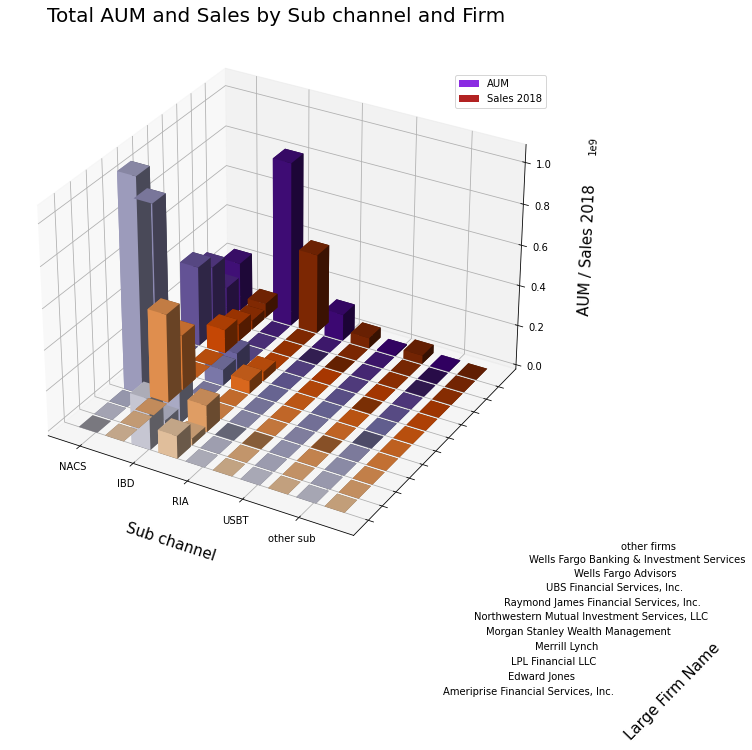

In [55]:
L = []
for i, group in grouped_df.groupby(level=1)['AUM']:
    L.append(group.values)
z = np.hstack(L).ravel()
xlabels = grouped_df.index.get_level_values('Sub channel').unique()
ylabels = grouped_df.index.get_level_values('Firm ID').unique()
x = np.arange(xlabels.shape[0])
y = np.arange(ylabels.shape[0])
S=[]
for i, group in grouped_df.groupby(level=1)['sales_2018']:
    S.append(group.values)
s = np.hstack(S).ravel()

x_M, y_M = np.meshgrid(x, y, copy=False)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Making the intervals in the axes match with their respective entries
ax.w_xaxis.set_ticks(x + 0.5/2.)
ax.w_yaxis.set_ticks(y + 0.5/2.)

# Renaming the ticks as they were before
ax.w_xaxis.set_ticklabels(xlabels)
ax.w_yaxis.set_ticklabels(ylabels)
ax.get_yaxis().set_tick_params(pad=135)

# Labeling the 3 dimensions
ax.set_xlabel('Sub channel',fontsize=15,labelpad=20)
ax.set_ylabel('Large Firm Name',labelpad=195,fontsize=15)
ax.set_zlabel('AUM / Sales 2018',fontsize=15,labelpad=20)

# Choosing the range of values to be extended in the set colormap
values = np.linspace(0.2, 1., x_M.ravel().shape[0])

# Selecting an appropriate colormap
colors = plt.cm.Purples(values)
ax.bar3d(x_M.ravel(), y_M.ravel(), z*0, dx=0.35, dy=0.9, dz=z, color=colors)
blue_proxy = plt.Rectangle((0, 0), 1, 1, fc="blueviolet")
colors2 = plt.cm.Oranges(values)
b=ax.bar3d(x_M.ravel()+0.5, y_M.ravel(), s*0, dx=0.35, dy=0.9, dz=s, color=colors2)
red_proxy = plt.Rectangle((0, 0), 1, 1, fc="firebrick")
plt.title('Total AUM and Sales by Sub channel and Firm ',fontsize=20,pad=-50)
ax.legend([blue_proxy,red_proxy],['AUM','Sales 2018'],bbox_to_anchor=(1, 0.92))

plt.show()

# A

In [56]:
full_test=pd.read_excel("regr_testnov23.xlsx")

In [57]:
full_test2=full_test.copy()
full_test2.head()

,Unnamed: 0,AUM,ch1,ch2,ch3,ch4,ch5,sales_2018,redemption,Sub channel,sales 2019,sales 2019 pred
0,3053,0.000000,1,0,0,0,0,0.00000,0.00000,IBD,-0.015342,2.308010
1,4259,0.000000,1,0,0,0,0,0.00000,0.00000,IBD,-0.015342,6.135134
2,8388,719361.772537,0,1,0,0,0,19995.83355,57509.61513,NACS,1554.224333,16231.354036
3,4697,0.000000,1,0,0,0,0,0.00000,0.00000,IBD,-0.015342,2.308010
4,609,0.000000,1,0,0,0,0,4616.72000,243.10000,IBD,-0.015342,95.378681


In [58]:
s8=full_test[['sales_2018']]
s9=full_test[['sales 2019']]
s9p=full_test[['sales 2019 pred']]

In [59]:
a9prr=full_test[['sales 2019 pred','redemption']]
a9p_rd=a9prr.copy()

a9p_rd['decile']=pd.qcut(a9p_rd['sales 2019 pred'],q=11,duplicates='drop')
# a9p_rd['decile'].value_counts()


a9p_rs=a9p_rd.groupby(by='decile').sum()
# print(a9p_rs)
a9p_rd.drop(['sales 2019 pred'], axis=1, inplace=True)
a9p_rc=a9p_rd.groupby(by='decile').count()
a9p_rc.rename({'redemption':'Count'},axis=1,inplace=True)
# print(a9p_rc)
a9p_rr=pd.concat((a9p_rs,a9p_rc),axis=1)
a9p_rr['Redemption/Advisor']=a9p_rr['redemption']/a9p_rr['Count']

a9p_rr=a9p_rr[['Redemption/Advisor']]
a9p_rr
# a9p_rr['decile']=['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th']
a9p_rr['decile']=['10th','9th','8th','7th','6th','5th','4th','3rd','2nd','1st']
a9p_rr.sort_values(by=['Redemption/Advisor'],inplace=True,ascending=False)
a9p_rr.set_index('decile', inplace=True)
# a9p_rr.sort_index(inplace=True)
a9p_rr

,Redemption/Advisor
decile,
1st,878832.993289
2nd,230479.867234
4th,187226.643878
3rd,113324.478481
5th,59577.513056
6th,42133.774841
8th,27358.836325
7th,19881.609504
9th,2045.718585


Text(0, 0.5, 'Redemption/Advisor')

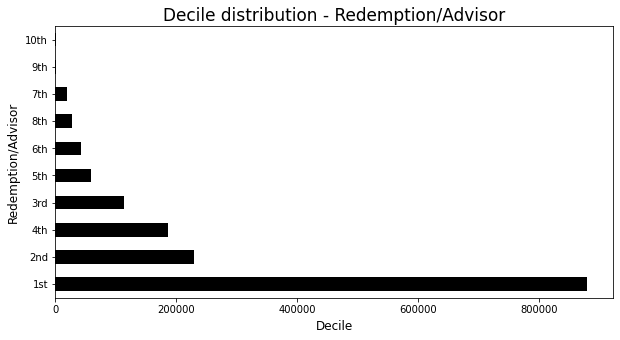

In [60]:
cmap = plt.cm.get_cmap('gnuplot')
cmap = plt.cm.get_cmap('gnuplot')
a9p_rr.plot(kind='barh',figsize=(10,5),cmap=cmap,legend=None)
plt.title('Decile distribution - Redemption/Advisor',fontsize=17,pad=5)
plt.xlabel("Decile",fontsize=12,labelpad=5)
plt.ylabel("Redemption/Advisor",fontsize=12,labelpad=5)

In [61]:
a9p=full_test[['sales 2019 pred','AUM']]
a9pr=a9p.copy()
a9pr['decile']=pd.qcut(a9pr['sales 2019 pred'],q=11,duplicates='drop')
# a9pre=a9pr.groupby(by='decile').count()
a9pr.drop(['sales 2019 pred'], axis=1, inplace=True)
a9prs=a9pr.groupby(by='decile').sum()
a9prs

,AUM
decile,
"(0.56, 1.294]",3.077840e+07
"(1.294, 2.308]",3.305357e+07
"(2.308, 6.183]",1.700196e+07
"(6.183, 10.053]",1.766954e+06
"(10.053, 47.146]",5.282089e+07
"(47.146, 246.958]",3.323011e+07
"(246.958, 2476.178]",6.570422e+07
"(2476.178, 19097.985]",8.613310e+07
"(19097.985, 130101.426]",1.494643e+08


In [62]:
a9prc=a9pr.groupby(by='decile').count()
a9prc.rename({'AUM':'Count'},axis=1,inplace=True)
a9pa=pd.concat((a9prs,a9prc),axis=1)
a9pa['AUM/Advisor']=a9pa['AUM']/a9pa['Count']
# a9pr.drop([0,1], axis=1, inplace=True)
a9pa=a9pa[['AUM/Advisor']]
a9pa

,AUM/Advisor
decile,
"(0.56, 1.294]",1.349930e+05
"(1.294, 2.308]",6.283949e+04
"(2.308, 6.183]",1.089869e+05
"(6.183, 10.053]",7.783938e+03
"(10.053, 47.146]",2.316706e+05
"(47.146, 246.958]",1.463881e+05
"(246.958, 2476.178]",2.894459e+05
"(2476.178, 19097.985]",3.777768e+05
"(19097.985, 130101.426]",6.584332e+05


In [63]:
# a9pa['decile']=['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th']
a9pa['decile']=['10th','9th','8th','7th','6th','5th','4th','3rd','2nd','1st']
a9pa.set_index('decile', inplace=True)
a9pa=a9pa.iloc[::-1]
a9pa

,AUM/Advisor
decile,
1st,3.500802e+06
2nd,6.584332e+05
3rd,3.777768e+05
4th,2.894459e+05
5th,1.463881e+05
6th,2.316706e+05
7th,7.783938e+03
8th,1.089869e+05
9th,6.283949e+04


Text(0, 0.5, 'AUM/Advisor')

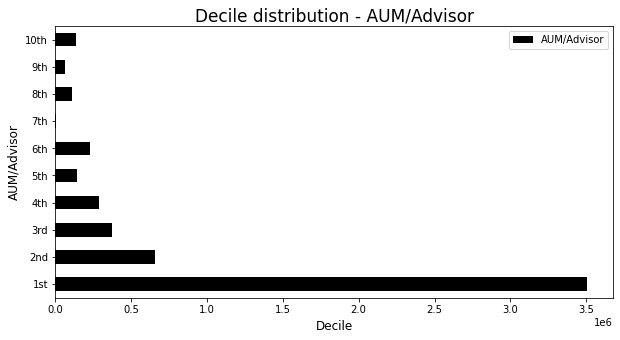

In [64]:
cmap = plt.cm.get_cmap('gnuplot')
a9pa.plot(kind='barh',figsize=(10,5),cmap=cmap)
plt.title('Decile distribution - AUM/Advisor',fontsize=17,pad=5)
plt.xlabel("Decile",fontsize=12,labelpad=5)
plt.ylabel("AUM/Advisor",fontsize=12,labelpad=5)

In [65]:
a9pa=a9pa.reset_index()
a9p_rr=a9p_rr.reset_index()
a9ar=pd.concat((a9pa,a9p_rr),axis=1)

# a9p_rr.set_index('Decile', inplace=True)
a9ar

,decile,AUM/Advisor,decile,Redemption/Advisor
0,1st,3.500802e+06,1st,878832.993289
1,2nd,6.584332e+05,2nd,230479.867234
2,3rd,3.777768e+05,4th,187226.643878
3,4th,2.894459e+05,3rd,113324.478481
4,5th,1.463881e+05,5th,59577.513056
5,6th,2.316706e+05,6th,42133.774841
6,7th,7.783938e+03,8th,27358.836325
7,8th,1.089869e+05,7th,19881.609504
8,9th,6.283949e+04,9th,2045.718585
9,10th,1.349930e+05,10th,905.583947


In [66]:
a9ar.drop(['decile'], axis=1, inplace=True)
a9ar

,AUM/Advisor,Redemption/Advisor
0,3.500802e+06,878832.993289
1,6.584332e+05,230479.867234
2,3.777768e+05,187226.643878
3,2.894459e+05,113324.478481
4,1.463881e+05,59577.513056
5,2.316706e+05,42133.774841
6,7.783938e+03,27358.836325
7,1.089869e+05,19881.609504
8,6.283949e+04,2045.718585
9,1.349930e+05,905.583947


In [67]:
a9ar['Decile']=['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th']


a9ar

,AUM/Advisor,Redemption/Advisor,Decile
0,3.500802e+06,878832.993289,1st
1,6.584332e+05,230479.867234,2nd
2,3.777768e+05,187226.643878,3rd
3,2.894459e+05,113324.478481,4th
4,1.463881e+05,59577.513056,5th
5,2.316706e+05,42133.774841,6th
6,7.783938e+03,27358.836325,7th
7,1.089869e+05,19881.609504,8th
8,6.283949e+04,2045.718585,9th
9,1.349930e+05,905.583947,10th


In [68]:
# a9ar=a9ar.iloc[::-1]
# a9ar

In [69]:
a9ar.set_index('Decile', inplace=True)
# a9ar.drop(['Decile'], axis=1, inplace=True)
a9ar

,AUM/Advisor,Redemption/Advisor
Decile,,
1st,3.500802e+06,878832.993289
2nd,6.584332e+05,230479.867234
3rd,3.777768e+05,187226.643878
4th,2.894459e+05,113324.478481
5th,1.463881e+05,59577.513056
6th,2.316706e+05,42133.774841
7th,7.783938e+03,27358.836325
8th,1.089869e+05,19881.609504
9th,6.283949e+04,2045.718585


Text(0, 0.5, 'Ratio')

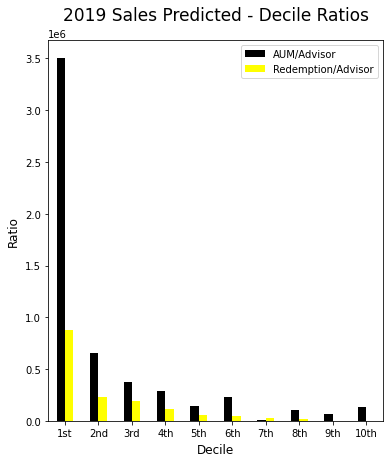

In [70]:
cmap = plt.cm.get_cmap('gnuplot')
a9ar.plot(kind='bar',figsize=(6,7),cmap=cmap)
plt.title('2019 Sales Predicted - Decile Ratios',fontsize=17,pad=20)
plt.xlabel("Decile",fontsize=12,labelpad=5)
plt.xticks(rotation=-360)
plt.ylabel("Ratio",fontsize=12,labelpad=5)

In [71]:
from mpl_toolkits.mplot3d import Axes3D

In [72]:
data = np.array(
[s8.sum(),s9.sum(),s9p.sum()]
)
data=pd.DataFrame(data, index=['Sales 2018', 'Sales 2019', 'Sales 2019 predicted'])
data.rename({0:'Amount'},axis=1,inplace=True)
# data=data.T
data

,Amount
Sales 2018,4.502650e+08
Sales 2019,5.537021e+08
Sales 2019 predicted,1.702110e+08


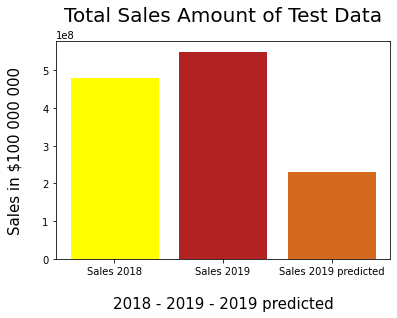

In [73]:
cmap = plt.cm.get_cmap('gnuplot')

# salesbar=data.plot(kind='barh', cmap=cmap,legend=None)
salesbar=plt.bar(['Sales 2018', 'Sales 2019', 'Sales 2019 predicted'],[4.804669e+08,5.491745e+08,2.307158e+08])
salesbar[0].set_color('yellow')
salesbar[1].set_color('firebrick')
salesbar[2].set_color('chocolate')
plt.title('Total Sales Amount of Test Data',fontsize=20,pad=20)
plt.ylabel("Sales in $100 000 000",fontsize=15,labelpad=20)
plt.xlabel("2018 - 2019 - 2019 predicted",fontsize=15,labelpad=20)
plt.show()

In [74]:
s8

,sales_2018
0,0.00000
1,0.00000
2,19995.83355
3,0.00000
4,4616.72000
...,...
2497,0.00000
2498,0.00000
2499,0.00000
2500,16556.40500


In [75]:
s8c=s8.copy()
s8c['decile']=pd.qcut(s8c['sales_2018'],q=20,duplicates='drop')
s8c

,sales_2018,decile
0,0.00000,"(-0.001, 525.558]"
1,0.00000,"(-0.001, 525.558]"
2,19995.83355,"(18210.215, 36027.572]"
3,0.00000,"(-0.001, 525.558]"
4,4616.72000,"(2752.896, 8058.278]"
...,...,...
2497,0.00000,"(-0.001, 525.558]"
2498,0.00000,"(-0.001, 525.558]"
2499,0.00000,"(-0.001, 525.558]"
2500,16556.40500,"(8058.278, 18210.215]"


In [76]:
s8c['decile'].value_counts()

(-0.001, 525.558]            1376
(681692.216, 57426470.21]     126
(291964.208, 681692.216]      125
(136773.931, 291964.208]      125
(68970.54, 136773.931]        125
(36027.572, 68970.54]         125
(18210.215, 36027.572]        125
(8058.278, 18210.215]         125
(2752.896, 8058.278]          125
(525.558, 2752.896]           125
Name: decile, dtype: int64

In [77]:
s8d=s8c.groupby(by='decile').count()
s8d

,sales_2018
decile,
"(-0.001, 525.558]",1376
"(525.558, 2752.896]",125
"(2752.896, 8058.278]",125
"(8058.278, 18210.215]",125
"(18210.215, 36027.572]",125
"(36027.572, 68970.54]",125
"(68970.54, 136773.931]",125
"(136773.931, 291964.208]",125
"(291964.208, 681692.216]",125


In [78]:
qbins=[31.185, 1054.031, 4976.437, 13682.967, 31293.592, 
 66172.849, 126228.854, 291057.602, 693641.901, 29791167.0]
# s8d['decile']=['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th']
s8d['decile']=['10th','9th','8th','7th','6th','5th','4th','3rd','2nd','1st']
s8d.iloc[::-1]
s8d['Sales 2018']=qbins
s8d['Sales 2018']=np.log(s8d['Sales 2018'])
s8d.set_index('decile', inplace=True)

s8d

,sales_2018,Sales 2018
decile,,
10th,1376,3.439937
9th,125,6.960377
8th,125,8.512469
7th,125,9.523907
6th,125,10.351169
5th,125,11.100026
4th,125,11.745852
3rd,125,12.581276
2nd,125,13.449711


In [79]:
s9pr=s9p.copy()
s9pr['decile']=pd.qcut(s9pr['sales 2019 pred'],q=11,duplicates='drop')
s9pre=s9pr.groupby(by='decile').count()
s9pre

,sales 2019 pred
decile,
"(0.56, 1.294]",228
"(1.294, 2.308]",526
"(2.308, 6.183]",156
"(6.183, 10.053]",227
"(10.053, 47.146]",228
"(47.146, 246.958]",227
"(246.958, 2476.178]",227
"(2476.178, 19097.985]",228
"(19097.985, 130101.426]",227


In [80]:
# s9pre['decile']=['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th']
s9pre['decile']=['10th','9th','8th','7th','6th','5th','4th','3rd','2nd','1st']
s9pre['Sales 2019 pred']=[ 1.623, 2.606, 3.227,7.561, 26.48, 171.652, 2579.823,17627.696, 128057.808, 10397834.989]
s9pre['Sales 2019 pred']=np.log(s9pre['Sales 2019 pred'])
s9pre.set_index('decile', inplace=True)
s9pre

,sales 2019 pred,Sales 2019 pred
decile,,
10th,228,0.484276
9th,526,0.957816
8th,156,1.171553
7th,227,2.023003
6th,228,3.276390
5th,227,5.145469
4th,227,7.855476
3rd,228,9.777227
2nd,227,11.760237


Text(0, 0.5, 'Count per decile')

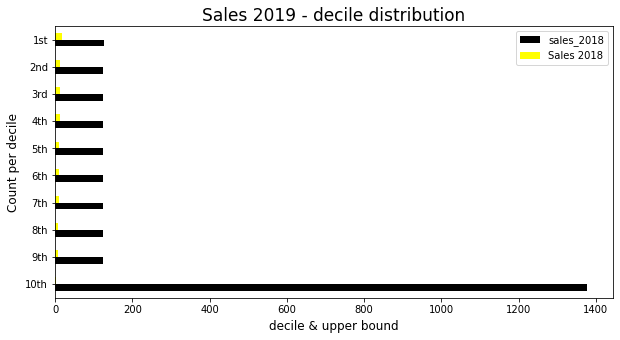

In [81]:
cmap = plt.cm.get_cmap('gnuplot')
s8d.plot(kind='barh',figsize=(10,5),cmap=cmap)
plt.title('Sales 2019 - decile distribution',fontsize=17,pad=5)
plt.xlabel("decile & upper bound",fontsize=12,labelpad=5)
plt.ylabel("Count per decile",fontsize=12,labelpad=5)

In [82]:
s9c=s9.copy()
s9c['decile']=pd.qcut(s9c['sales 2019'],q=18,duplicates='drop')
s9d=s9c.groupby(by='decile').count()
# s9d['decile']=[('1st',300),('2nd',2000),('3rd',6700),('4th',16600),
#                                 ('5th',33600),('6th',67000),('7th',150000),('8th',325000),
#                                 ('9th',860000),('10th',27000000)]
s9d

,sales 2019
decile,
"(-0.0163, 101.556]",1251
"(101.556, 1622.426]",139
"(1622.426, 4821.011]",139
"(4821.011, 12336.817]",139
"(12336.817, 28532.661]",139
"(28532.661, 58535.156]",139
"(58535.156, 118863.42]",139
"(118863.42, 278627.177]",139
"(278627.177, 774429.198]",139


In [83]:
# s9d['decile']=['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th']
# s9d['decile']=['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th']
s9d['decile']=['10th','9th','8th','7th','6th','5th','4th','3rd','2nd','1st']
s9d['Sales 2019']=[293.49, 2002.667,6711.731, 16656.068,33594.072, 67069.222, 
                        149108.562,326334.333,862352.162,26884452.697]
s9d['Sales 2019']=np.log(s9d['Sales 2019'])
s9d.set_index('decile', inplace=True)
s9d

,sales 2019,Sales 2019
decile,,
10th,1251,5.681844
9th,139,7.602235
8th,139,8.811612
7th,139,9.720530
6th,139,10.422105
5th,139,11.113481
4th,139,11.912430
3rd,139,12.695678
2nd,139,13.667419


Text(0, 0.5, 'Count per decile')

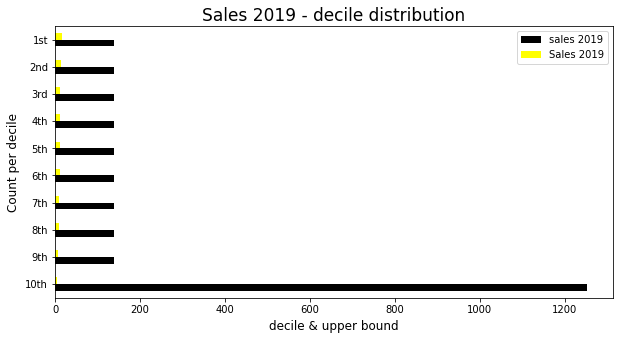

In [84]:
cmap = plt.cm.get_cmap('gnuplot')
s9d.plot(kind='barh',figsize=(10,5),cmap=cmap)
plt.title('Sales 2019 - decile distribution',fontsize=17,pad=5)
plt.xlabel("decile & upper bound",fontsize=12,labelpad=5)
plt.ylabel("Count per decile",fontsize=12,labelpad=5)

In [85]:
sd=pd.concat((s8d,s9d,s9pre),axis=1)
sdcount=sd[['sales_2018','sales 2019', 'sales 2019 pred']]
sd.drop(['sales_2018','sales 2019', 'sales 2019 pred'], axis=1, inplace=True)
sd

,Sales 2018,Sales 2019,Sales 2019 pred
decile,,,
10th,3.439937,5.681844,0.484276
9th,6.960377,7.602235,0.957816
8th,8.512469,8.811612,1.171553
7th,9.523907,9.720530,2.023003
6th,10.351169,10.422105,3.276390
5th,11.100026,11.113481,5.145469
4th,11.745852,11.912430,7.855476
3rd,12.581276,12.695678,9.777227
2nd,13.449711,13.667419,11.760237


Text(0, 0.5, 'Decile')

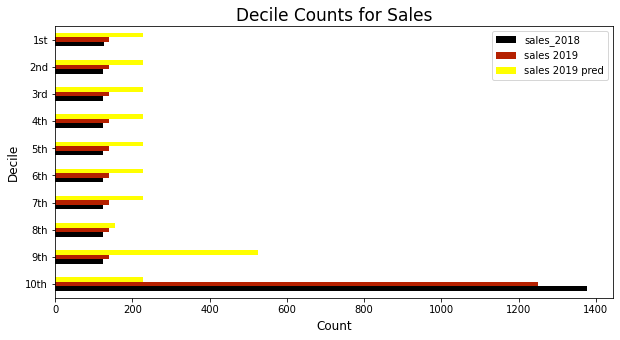

In [86]:
cmap = plt.cm.get_cmap('gnuplot')
sdcount.plot(kind='barh',figsize=(10,5),cmap=cmap)
plt.title('Decile Counts for Sales',fontsize=17,pad=5)
plt.xlabel("Count",fontsize=12,labelpad=5)
plt.ylabel("Decile",fontsize=12,labelpad=5)

Text(0, 0.5, 'Decile')

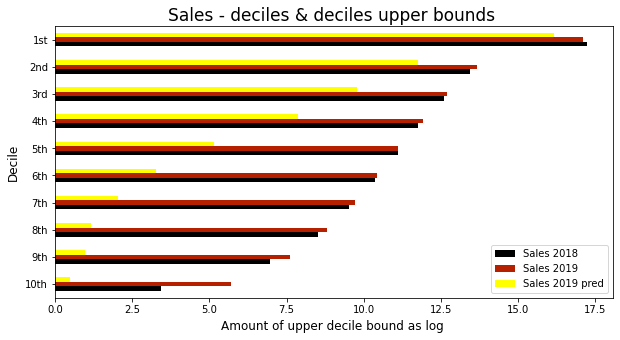

In [87]:
cmap = plt.cm.get_cmap('gnuplot')
sd.plot(kind='barh',figsize=(10,5),cmap=cmap)
plt.title('Sales - deciles & deciles upper bounds ',fontsize=17,pad=5)
plt.xlabel("Amount of upper decile bound as log ",fontsize=12,labelpad=5)
plt.ylabel("Decile",fontsize=12,labelpad=5)

NameError: name 'column_names' is not defined

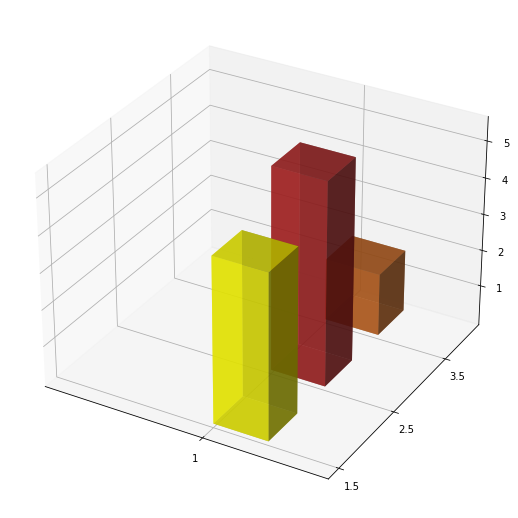

In [88]:
data = np.array(
[s8.sum(),s9.sum(),s9p.sum()]
)

# column_names = ['Total Sales']
row_names = ['Sales 2018', 'Sales 2019', 'Sales 2019 predicted']
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d')
fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig)

# lx= len(data[0]) # Work out matrix dimensions
lx=1
# ly= len(data[:,0])
ly=3
# xpos = np.arange(0,1)  # Set up a mesh of positions
# print(xpos)
# ppos = np.arange(0,ly,1)
# print(xpos)
# xpos, ypos = np.meshgrid(xpos+0.25,ypos+0.5)
# print(ypos)
# print(xpos)
xpos=list([1])
ypos=list([1.5,2.5,3.5])

# xpos = xpos.flatten()   # Convert positions to 1D array
# ypos = ypos.flatten()
# zpos = np.zeros(lx*ly)

# dx = 0.5* np.ones_like(zpos)
# dy = dx.copy()
dx=[1,1,1]
dz = data.flatten()
colors2 = ['yellow','firebrick','chocolate']
# ax.bar3d(xpos,ypos,zpos, dx=0.35,dy=0.9,dz, color=colors2)
ax.bar3d(xpos,ypos,3, 0.35, 0.5, dz, color=colors2,alpha=0.7)
# ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1,1, 1, 1]))
# ax.get_xlim3d()=[0.4
ax.set_xlim3d(0,1.75)
ax.w_xaxis.set_ticks(xpos)
ax.w_yaxis.set_ticks(ypos)
ax.w_xaxis.set_ticklabels(column_names)
# ax.set_xlabel('Sales 2018', fontsize=20)
ax.w_yaxis.set_ticklabels(row_names)
ax.get_yaxis().set_tick_params(pad=35, size=30)
# ax.set_xlabel('Sales Feature')
# ax.set_ylabel('2018-2019-2019 predicted',fontsize=10,labelpad=20)
ax.set_zlabel('Sales [$10M]',fontsize=12,labelpad=10)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
# ax.xaxis.pane.set_edgecolor('w')
# ax.yaxis.pane.set_edgecolor('w')
# ax.zaxis.pane.set_edgecolor('w')
# Hide grid lines
ax.grid(False)
plt.title('Total Sales 2018 - 2019 - 2019 predicted',fontsize=15,pad=-70)
# Hide axes ticks
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])
plt.show()

In [ ]:
# abc+1

# B

In [89]:
def subts_barchart(df):
    df.drop(['Unnamed: 0','ch1', 'ch2','ch3','ch4','ch5'], axis=1, inplace=True)
    AUMsum=df.groupby('Sub channel').sum()
    aumvc=pd.DataFrame(df['Sub channel'].value_counts())
    aumvc.rename({'Sub channel':'Counts'},axis=1,inplace=True)
    aumvc.index.rename('Sub channel',inplace=True)
    aum_r1=pd.merge(AUMsum, aumvc,on='Sub channel')
    aum_r1['AUM/Advisor']=aum_r1['AUM']/aum_r1['Counts']
    aum_r1['Sales 2018/Advisor']=aum_r1['sales_2018']/aum_r1['Counts']
    aum_r1['Sales 2019/Advisor']=aum_r1['sales 2019']/aum_r1['Counts']
    aum_r1['Sales 2019 pred/Advisor']=aum_r1['sales 2019 pred']/aum_r1['Counts']
    aum_r1['Redemption/Advisor']=aum_r1['redemption']/aum_r1['Counts']
    aum_r2=aum_r1.T
    aum_r3=aum_r2.apply(lambda x: x/(aum_r2.sum(axis=1)))
    aum_r3['Feature']=['AUM','sales_2018','redemption','sales 2019','sales 2019 pred','Counts','AUM/Advisor',
                       'Sales 2018/Advisor','Sales 2019/Advisor','Sales 2019 pred/Advisor','Redemption/Advisor']
#     aum_r3.plot(x='Feature', kind='bar',stacked=True)
#     plt.legend(loc='center left' ,bbox_to_anchor=(1, 0.75))
    return aum_r3, aum_r2

In [90]:
aum_r3,aum_r2=subts_barchart(full_test)

In [91]:
aum_r6=aum_r3.T
# aum_r6.drop(['redemption','redemption/Advisor'], axis=1, inplace=True)

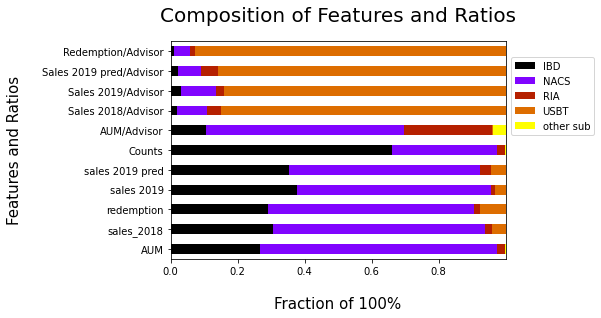

In [92]:
aum_r3=aum_r6.T
cmap = plt.cm.get_cmap('gnuplot')
aum_r3.plot(x='Feature', kind='barh',stacked=True, cmap=cmap)
# plt.xticks(rotation=45)
plt.title('Composition of Features and Ratios',fontsize=20,pad=20)
plt.ylabel("Features and Ratios",fontsize=15,labelpad=20)
plt.xlabel("Fraction of 100%",fontsize=15,labelpad=20)
plt.legend(loc='center left' ,bbox_to_anchor=(1, 0.75))

In [93]:
aum_r4=aum_r2.T[['AUM/Advisor','Sales 2018/Advisor','Sales 2019/Advisor','Sales 2019 pred/Advisor','Redemption/Advisor']]

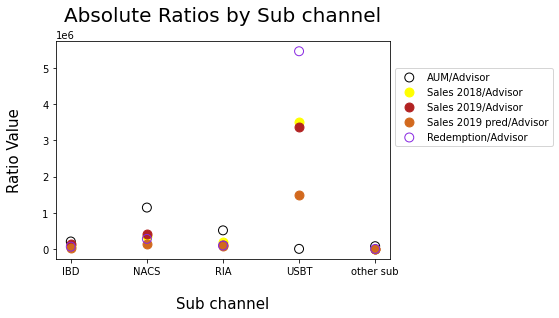

In [94]:
aum_r5=aum_r4.T
a=plt.scatter(aum_r5.columns.tolist(),aum_r5.loc['AUM/Advisor',:],facecolors='none',edgecolors='black',s=80)
b=plt.scatter(aum_r5.columns.tolist(),aum_r5.loc['Sales 2018/Advisor',:],c='yellow',s=80)
c=plt.scatter(aum_r5.columns.tolist(),aum_r5.loc['Sales 2019/Advisor',:],c='firebrick',s=80)
d=plt.scatter(aum_r5.columns.tolist(),aum_r5.loc['Sales 2019 pred/Advisor',:],c='chocolate',s=80)
e=plt.scatter(aum_r5.columns.tolist(),aum_r5.loc['Redemption/Advisor',:],facecolors='none',edgecolors='blueviolet',s=80)
plt.title('Absolute Ratios by Sub channel',fontsize=20,pad=20)
plt.xlabel("Sub channel",fontsize=15,labelpad=20)
plt.ylabel("Ratio Value",fontsize=15,labelpad=20)
plt.legend([a,b,c,d,e],['AUM/Advisor','Sales 2018/Advisor',
                        'Sales 2019/Advisor','Sales 2019 pred/Advisor','Redemption/Advisor'],
                       bbox_to_anchor=(1.5, 0.9))

# BF

In [95]:
full_tf=pd.read_excel("regr_tsfirmsnov23.xlsx")

In [96]:
full_tf.head()

,Unnamed: 0,AUM,fid1,fid2,fid3,fid4,fid5,fid6,fid7,fid8,fid9,fid10,fid11,sales_2018,redemption,Firm ID,sales 2019,sales 2019 pred
0,3053,0.000000,0,0,0,0,0,0,0,0,0,0,1,0.00000,0.00000,1607.0,-0.015342,2.308010
1,4259,0.000000,0,1,0,0,0,0,0,0,0,0,0,0.00000,0.00000,2096.0,-0.015342,6.135134
2,8388,719361.772537,0,0,0,0,0,0,0,1,0,0,0,19995.83355,57509.61513,1948520.0,1554.224333,16231.354036
3,4697,0.000000,0,0,0,0,0,0,0,0,0,0,1,0.00000,0.00000,1607.0,-0.015342,2.308010
4,609,0.000000,0,0,0,0,1,0,0,0,0,0,0,4616.72000,243.10000,1471422.0,-0.015342,95.378681


In [97]:
fmd_reg=full_tf[['sales 2019 pred','Firm ID']]

In [98]:
fmd_reg['decile']=pd.qcut(fmd_reg['sales 2019 pred'],q=11,duplicates='drop')

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [99]:
fmd_reg['decile'].value_counts()

(1.294, 2.308]               526
(130101.426, 8783226.572]    228
(2476.178, 19097.985]        228
(10.053, 47.146]             228
(0.56, 1.294]                228
(19097.985, 130101.426]      227
(246.958, 2476.178]          227
(47.146, 246.958]            227
(6.183, 10.053]              227
(2.308, 6.183]               156
Name: decile, dtype: int64

In [100]:
fmd_reg['decile'] = fmd_reg['decile'].astype(str)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [101]:
fmd_reg2 = fmd_reg[(fmd_reg['decile'] == '(130101.426, 8783226.572]') | (fmd_reg['decile'] == '(19097.985, 130101.426]')]

In [102]:
fmd_reg2.shape

(455, 3)

In [103]:
full_tf['sales 2019 pred'].sum()

170211025.6564064

In [104]:
fmd_reg2['sales 2019 pred'].sum()

167903999.64289564

In [105]:
fmd_reg2['sales 2019 pred'].sum()/full_tf['sales 2019 pred'].sum()

0.9864460835917421

In [106]:
fmd1=fmd_reg[fmd_reg['decile'] == '(130101.426, 8783226.572]']

In [107]:
fmd1['sales 2019 pred'].sum()

155005500.00234467

In [108]:
fmd1['sales 2019 pred'].sum()/full_tf['sales 2019 pred'].sum()

0.910666623413949

In [109]:
fmd_reg2['Firm ID'].value_counts()

1.607000e+03    139
1.567450e+06     63
1.948520e+06     50
1.194000e+03     46
9.000166e+06     34
2.288500e+04     33
1.688552e+06     25
8.520111e+19     22
3.350900e+04     19
1.471422e+06     18
2.096000e+03      6
Name: Firm ID, dtype: int64

In [110]:
fmd_reg2.groupby('Firm ID').sum()


,sales 2019 pred
Firm ID,
1.194000e+03,1.606269e+07
1.607000e+03,4.491360e+07
2.096000e+03,1.347747e+06
2.288500e+04,7.160530e+06
3.350900e+04,3.569123e+06
1.471422e+06,3.221190e+06
1.567450e+06,4.032832e+07
1.688552e+06,8.990884e+06
1.948520e+06,2.709632e+07


In [111]:
fmd_reg0=full_tf[['Unnamed: 0','Firm ID']]

In [112]:
mon_df=pd.merge(full_test2, fmd_reg0, on = 'Unnamed: 0')

In [113]:
mon_df2=mon_df[['Unnamed: 0','Firm ID','sales 2019 pred','Sub channel']]
mon_df2.head()

,Unnamed: 0,Firm ID,sales 2019 pred,Sub channel
0,3053,1607.0,2.308010,IBD
1,4259,2096.0,6.135134,IBD
2,8388,1948520.0,16231.354036,NACS
3,4697,1607.0,2.308010,IBD
4,609,1471422.0,95.378681,IBD


In [114]:
mon_df2['decile']=pd.qcut(mon_df2['sales 2019 pred'],q=11,duplicates='drop')

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [115]:
mon_df2['decile'].value_counts()

(1.294, 2.308]               526
(130101.426, 8783226.572]    228
(2476.178, 19097.985]        228
(10.053, 47.146]             228
(0.56, 1.294]                228
(19097.985, 130101.426]      227
(246.958, 2476.178]          227
(47.146, 246.958]            227
(6.183, 10.053]              227
(2.308, 6.183]               156
Name: decile, dtype: int64

In [116]:
mon_df2['decile'] = mon_df2['decile'].astype(str)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [117]:
mon_df3 = mon_df2[(mon_df2['decile'] == '(130101.426, 8783226.572]') | (mon_df2['decile'] == '(19097.985, 130101.426]')]

In [118]:
mon_df3.shape

(455, 5)

In [119]:
mon_df3['Sub channel'].value_counts()

IBD     228
NACS    213
RIA      12
USBT      2
Name: Sub channel, dtype: int64

In [120]:
mon_df2['Sub channel'].value_counts()

IBD          1651
NACS          785
RIA            59
USBT            5
other sub       2
Name: Sub channel, dtype: int64

In [121]:
mon_df4=mon_df3.drop(['decile','Unnamed: 0'], axis=1)

In [122]:
mon_df4.head()

,Firm ID,sales 2019 pred,Sub channel
15,1567450.0,271130.390772,NACS
16,1607.0,121881.282333,IBD
26,1194.0,153344.714704,IBD
30,1607.0,29515.829469,IBD
32,1607.0,324066.990104,IBD


In [123]:
mon_df4.columns

Index(['Firm ID', 'sales 2019 pred', 'Sub channel'], dtype='object')

In [124]:
mon_df5=mon_df4.groupby(['Sub channel','Firm ID']).sum()
# .sort_values('sales 2019 pred')
mon_df5.sortlevel(by='sales 2019 pred', ascending=False)
mon_df5

AttributeError: 'DataFrame' object has no attribute 'sortlevel'

In [125]:
mon_df4.groupby(['Sub channel','Firm ID']).sum()

sales 2019 pred
Sub channel Firm ID                      
IBD         1.194000e+03     1.606269e+07
            1.607000e+03     2.705118e+07
            2.096000e+03     1.347747e+06
            2.288500e+04     7.160530e+06
            3.350900e+04     3.569123e+06
            1.471422e+06     3.221190e+06
NACS        1.607000e+03     5.068414e+06
            1.567450e+06     4.032832e+07
            1.688552e+06     8.990884e+06
            1.948520e+06     2.709632e+07
            9.000166e+06     8.633587e+06
            8.520111e+19     6.580009e+06
RIA         1.607000e+03     5.275426e+06
USBT        1.607000e+03     7.518578e+06

In [126]:
dec_fn={'0001194': 'Ameriprise Financial Services, Inc.', 
        '0002096': 'Raymond James Financial Services, Inc.',
 '0022885': 'LPL Financial LLC', 
        '0033509': 'Northwestern Mutual Investment Services, LLC',
 '1471422': 'Edward Jones',
 '1567450': 'Merrill Lynch',
 '1688552': 'UBS Financial Services, Inc.',
 '1948520': 'Morgan Stanley Wealth Management',
 '85201112683918276481': 'Wells Fargo Banking & Investment Services',
 '9000166': 'Wells Fargo Advisors',
 'smaller firms': 'other firms'}

In [127]:
idx = pd.MultiIndex.from_product([['IBD', 'NACS', 'RIA','USBT'],
                                  ['Ameriprise Financial Services, Inc.','Raymond James Financial Services, Inc.',
 'LPL Financial LLC',
 'Northwestern Mutual Investment Services, LLC',
 'Edward Jones',
 'Merrill Lynch',
 'UBS Financial Services, Inc.',
 'Morgan Stanley Wealth Management',
 'Wells Fargo Banking & Investment Services',
 'Wells Fargo Advisors','other firms']],
                                 names=['Sub channel', 'Firm ID'])
col = ['sales 2019 pred']
values=[1.606269e+07,1.347747e+06,7.160530e+06,3.569123e+06,3.221190e+06,0,0,0,0,0,2.705118e+07,
       0,0,0,0,0,4.032832e+07,8.990884e+06,2.709632e+07,6.580009e+06,8.633587e+06,5.068414e+06,
        0,0,0,0,0,0,0,0,0,0,5.275426e+06,
         0,0,0,0,0,0,0,0,0,0,7.518578e+06,
       ]
df = pd.DataFrame(values, idx, col)
df

sales 2019 pred
Sub channel Firm ID                                                      
IBD         Ameriprise Financial Services, Inc.                16062690.0
            Raymond James Financial Services, Inc.              1347747.0
            LPL Financial LLC                                   7160530.0
            Northwestern Mutual Investment Services, LLC        3569123.0
            Edward Jones                                        3221190.0
            Merrill Lynch                                             0.0
            UBS Financial Services, Inc.                              0.0
            Morgan Stanley Wealth Management                          0.0
            Wells Fargo Banking & Investment Services                 0.0
            Wells Fargo Advisors                                      0.0
            other firms                                        27051180.0
NACS        Ameriprise Financial Services, Inc.                       0.0
            Raymond James Financial Services, Inc.                    0.0
            LPL Financial LLC                                         0.0
            Northwestern Mutual Investment Services, LLC              0.0
            Edward Jones                                              0.0
            Merrill Lynch                                      40328320.0
            UBS Financial Services, Inc.                        8990884.0
            Morgan Stanley Wealth Management                   27096320.0
            Wells Fargo Banking & Investment Services           6580009.0
            Wells Fargo Advisors                                8633587.0
            other firms                                         5068414.0
RIA         Ameriprise Financial Services, Inc.                       0.0
            Raymond James Financial Services, Inc.                    0.0
            LPL Financial LLC                                         0.0
            Northwestern Mutual Investment Services, LLC              0.0
            Edward Jones                                              0.0
            Merrill Lynch                                             0.0
            UBS Financial Services, Inc.                              0.0
            Morgan Stanley Wealth Management                          0.0
            Wells Fargo Banking & Investment Services                 0.0
            Wells Fargo Advisors                                      0.0
            other firms                                         5275426.0
USBT        Ameriprise Financial Services, Inc.                       0.0
            Raymond James Financial Services, Inc.                    0.0
            LPL Financial LLC                                         0.0
            Northwestern Mutual Investment Services, LLC              0.0
            Edward Jones                                              0.0
            Merrill Lynch                                             0.0
            UBS Financial Services, Inc.                              0.0
            Morgan Stanley Wealth Management                          0.0
            Wells Fargo Banking & Investment Services                 0.0
            Wells Fargo Advisors                                      0.0
            other firms                                         7518578.0

In [128]:
def fits_barchart(df):
    df.drop(['Unnamed: 0','fid1','fid2','fid3','fid4','fid5','fid6','fid7','fid8','fid9','fid10','fid11'], axis=1, inplace=True)
    FIsum=df.groupby('Firm ID').sum()
    firmvc=pd.DataFrame(df['Firm ID'].value_counts())
    firmvc.rename({'Firm ID':'Counts'},axis=1,inplace=True)
    firmvc.index.rename('Firm ID',inplace=True)
    frm_r1=pd.merge(FIsum, firmvc,on='Firm ID')
    frm_r1['AUM/Advisor']=frm_r1['AUM']/frm_r1['Counts']
    frm_r1['Sales 2018/Advisor']=frm_r1['sales_2018']/frm_r1['Counts']
    frm_r1['Sales 2019/Advisor']=frm_r1['sales 2019']/frm_r1['Counts']
    frm_r1['Sales 2019 pred/Advisor']=frm_r1['sales 2019 pred']/frm_r1['Counts']
    frm_r1['Redemption/Advisor']=frm_r1['redemption']/frm_r1['Counts']
    frm_r2=frm_r1.T
    frm_r3=frm_r2.apply(lambda x: x/(frm_r2.sum(axis=1)))
    frm_r3['Feature']=['AUM','sales_2018','Redemption','sales 2019','sales 2019 pred','Counts','AUM/Advisor',
                       'Sales 2018/Advisor','Sales 2019/Advisor','Sales 2019 pred/Advisor','Redemption/Advisor']
#     frm_r3.plot(x='Feature', kind='bar',stacked=True)
#     plt.legend(loc='center left' ,bbox_to_anchor=(1, 0.75))
    return frm_r2,frm_r3  

In [129]:
frm_r2,frm_r3=fits_barchart(full_tf)

In [130]:
frm_r7=frm_r3.T
frm_r7['Firm ID']=['Ameriprise Financial Services, Inc.','other firms','Raymond James Financial Services, Inc.',
                   'LPL Financial LLC' ,'Northwestern Mutual Investment Services, LLC','Edward Jones', 
                   'Merrill Lynch', 'UBS Financial Services, Inc.','Morgan Stanley Wealth Management',
                   'Wells Fargo Advisors','Wells Fargo Banking & Investment Services','Feature']
# frm_r7.drop(['redemption','redemption/Advisor'], axis=1, inplace=True)
frm_r7.rename({'Firm ID':'Firm name'},axis=1,inplace=True)
frm_r7.set_index('Firm name', inplace=True)

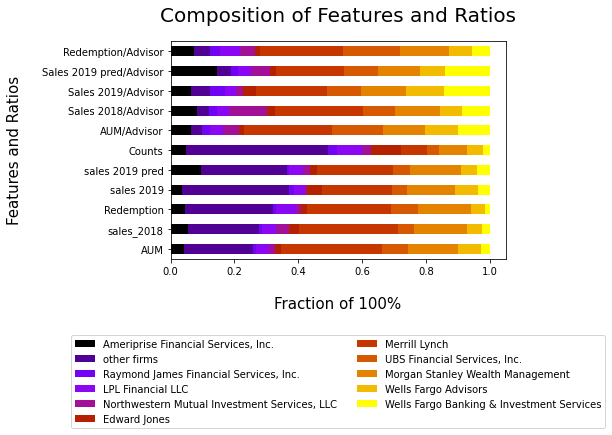

In [131]:
frm_r3=frm_r7.T
frm_r3
cmap = plt.cm.get_cmap('gnuplot')
frm_r3.plot(x='Feature', kind='barh',stacked=True, cmap=cmap)
# plt.xticks(rotation=45)
plt.title('Composition of Features and Ratios',fontsize=20,pad=20)
plt.ylabel("Features and Ratios",fontsize=15,labelpad=20)
plt.xlabel("Fraction of 100%",fontsize=15,labelpad=20)
plt.legend(loc='lower center' ,bbox_to_anchor=(0.5, -0.8), ncol=2)

In [132]:
frm_r4=frm_r2.T[['AUM/Advisor','Sales 2018/Advisor','Sales 2019/Advisor','Sales 2019 pred/Advisor','Redemption/Advisor']]
frm_r4['Firm ID']=['Ameriprise Fin','other firms','Raymond James Fin',
                   'LPL Fin.' ,'Northwestern Mutual Inv','Edward Jones', 
                   'Merrill Lynch', 'UBS Fin','Morgan Stanley Wealth Mgt',
                   'Wells Fargo Adv','Wells Fargo Bank & Inv']
frm_r4.rename({'Firm ID':'Firm name'},axis=1,inplace=True)
frm_r4.set_index('Firm name', inplace=True)
frm_r4

,AUM/Advisor,Sales 2018/Advisor,Sales 2019/Advisor,Sales 2019 pred/Advisor,Redemption/Advisor
Firm name,,,,,
Ameriprise Fin,4.436337e+05,203486.148336,167001.535539,132681.423429,130343.152764
other firms,2.443664e+05,89367.561542,166367.698564,40935.594174,87634.518232
Raymond James Fin,1.809444e+05,58436.054531,121798.427703,21733.762216,52706.961328
LPL Fin.,2.670466e+05,97469.430570,91493.289204,35777.012456,109442.196897
Northwestern Mutual Inv,3.589372e+05,287643.749531,65480.083447,56338.434314,83551.054688
Edward Jones,1.006720e+05,61113.058193,107334.859800,15627.885941,27433.966113
Merrill Lynch,1.939854e+06,675957.204060,591887.469969,197082.762922,456829.406232
UBS Fin,1.117457e+06,246323.527417,288680.081109,97768.385720,313284.874231
Morgan Stanley Wealth Mgt,9.015500e+05,339694.029403,376041.174520,122943.429018,268872.913339


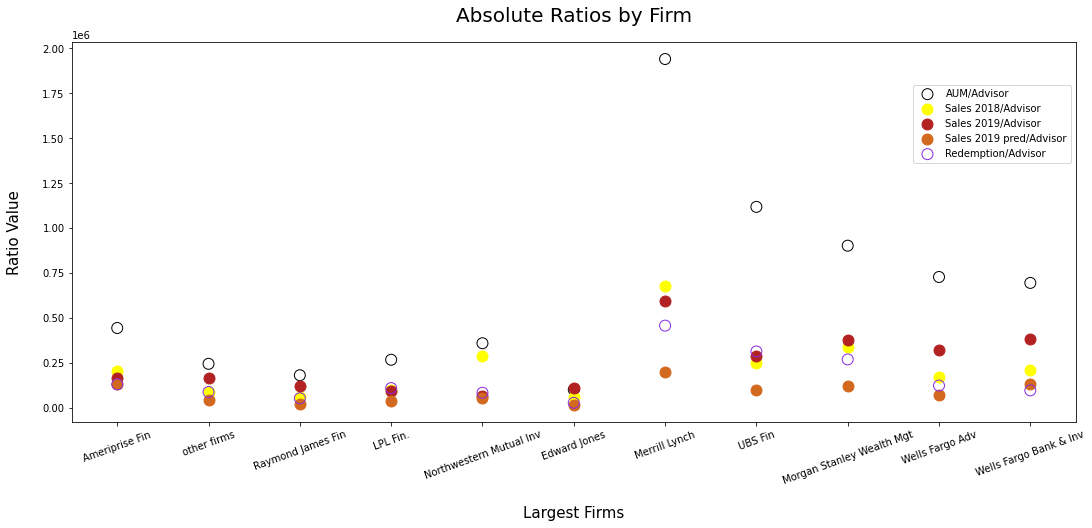

In [133]:
frm_r5=frm_r4.T
frm_r5
fcol=frm_r5.columns.tolist()
fcol=[str(i) for i in fcol]
type(fcol[1])
plt.figure(figsize=(18,7))
plt.xticks(rotation=20)
plt.title('Absolute Ratios by Firm',fontsize=20,pad=20)
plt.xlabel("Largest Firms",fontsize=15,labelpad=20)
plt.ylabel("Ratio Value",fontsize=15,labelpad=20)
a=plt.scatter(fcol,frm_r5.loc['AUM/Advisor',:],facecolors='none',edgecolors='black',s=120)
b=plt.scatter(fcol,frm_r5.loc['Sales 2018/Advisor',:],c='yellow',s=120)
c=plt.scatter(fcol,frm_r5.loc['Sales 2019/Advisor',:],c='firebrick',s=120)
d=plt.scatter(fcol,frm_r5.loc['Sales 2019 pred/Advisor',:],c='chocolate',s=120)
e=plt.scatter(fcol,frm_r5.loc['Redemption/Advisor',:],facecolors='none',edgecolors='blueviolet',s=120)
plt.legend([a,b,c,d,e],['AUM/Advisor','Sales 2018/Advisor','Sales 2019/Advisor','Sales 2019 pred/Advisor',
                        'Redemption/Advisor'],bbox_to_anchor=(1, 0.9))


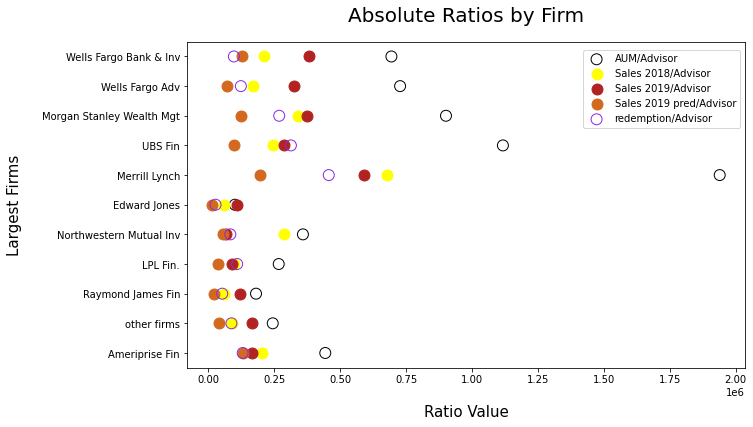

In [134]:
# frm_r5=frm_r4.T
# frm_r5
# fcol=frm_r5.columns.tolist()
# fcol=[str(i) for i in fcol]
# type(fcol[1])
plt.figure(figsize=(10,6))
# plt.xticks(rotation=20)
plt.title('Absolute Ratios by Firm',fontsize=20,pad=20)
plt.ylabel("Largest Firms",fontsize=15,labelpad=20)
plt.xlabel("Ratio Value",fontsize=15,labelpad=20)
a=plt.scatter(frm_r4.loc[:,'AUM/Advisor'],fcol,facecolors='none',edgecolors='black',s=120)
b=plt.scatter(frm_r4.loc[:,'Sales 2018/Advisor'],fcol,c='yellow',s=120)
c=plt.scatter(frm_r4.loc[:,'Sales 2019/Advisor'],fcol,c='firebrick',s=120)
d=plt.scatter(frm_r4.loc[:,'Sales 2019 pred/Advisor'],fcol,c='chocolate',s=120)
e=plt.scatter(frm_r4.loc[:,'Redemption/Advisor'],fcol,facecolors='none',edgecolors='blueviolet',s=120)
plt.legend([a,b,c,d,e],['AUM/Advisor','Sales 2018/Advisor','Sales 2019/Advisor','Sales 2019 pred/Advisor',
                        'redemption/Advisor'],bbox_to_anchor=(1, 0.99))

In [135]:
abc+1

NameError: name 'abc' is not defined

[Back to Top](#Index)

# C

In [136]:
classdf=pd.read_excel("classdf.xlsx")

In [137]:
classdf.drop(['Unnamed: 0','ch1','ch2','ch3','ch4','ch5','fid1','fid2','fid3','fid4','fid5','fid6'], axis=1, inplace=True)
cols=classdf.columns.tolist()
classdf.drop([cols[0]],axis=1,inplace=True)
classdf.drop(['prob','predict'],axis=1,inplace=True)
dec_ch=classdf[['decile','Sub channel']]

In [138]:
deciles=dec_ch['decile'].unique().tolist()
dd={}
dfl=[]
for d in deciles:
    fl=float(d[-6:-1])
    dfl.append(fl)
dfl.sort(reverse=True)
for idx,row in dec_ch.iterrows():
    rank=dfl.index(float(row['decile'][-6:-1]))+1
    dec_ch.loc[idx,'Rank']=rank 

In [139]:
dec_ch

,decile,Sub channel,Rank
0,"(0.026799999999999997, 0.111]",IBD,10.0
1,"(0.361, 0.385]",IBD,5.0
2,"(0.111, 0.175]",IBD,9.0
3,"(0.026799999999999997, 0.111]",IBD,10.0
4,"(0.111, 0.175]",IBD,9.0
...,...,...,...
2497,"(0.361, 0.385]",IBD,5.0
2498,"(0.29, 0.361]",IBD,6.0
2499,"(0.421, 0.476]",NACS,3.0
2500,"(0.385, 0.421]",NACS,4.0


In [140]:
dech2=dec_ch.copy()
dech2.drop(['decile'],axis=1,inplace=True)
dech2.groupby(['Sub channel']).agg(['count'])
ibd= dech2.loc[dech2['Sub channel'] == 'IBD' ] 
ibd=pd.DataFrame(ibd['Rank'].value_counts())
ibd.rename({'Rank':'IBD'},axis=1,inplace=True)
ibd.sort_index(inplace=True)
nacs= dech2.loc[dech2['Sub channel'] == 'NACS' ] 

nacs=pd.DataFrame(nacs['Rank'].value_counts())
nacs.rename({'Rank':'NACS'},axis=1,inplace=True)
nacs.sort_index(inplace=True)
ria= dech2.loc[dech2['Sub channel'] == 'RIA' ] 

ria=pd.DataFrame(ria['Rank'].value_counts())
ria.rename({'Rank':'RIA'},axis=1,inplace=True)
ria.sort_index(inplace=True)
usbt=dech2.loc[dech2['Sub channel'] == 'USBT' ] 

usbt=pd.DataFrame(usbt['Rank'].value_counts())
usbt.rename({'Rank':'USBT'},axis=1,inplace=True)
usbt.sort_index(inplace=True)

In [141]:
newdec=pd.concat((ibd,nacs,ria,usbt),axis=1)
newdec['decile'] = newdec.index
newdec['decile']=['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th']
newdec=fillna_values(newdec)
newdec.set_index(['decile'], inplace=True)

Text(0, 0.5, 'Count per decile')

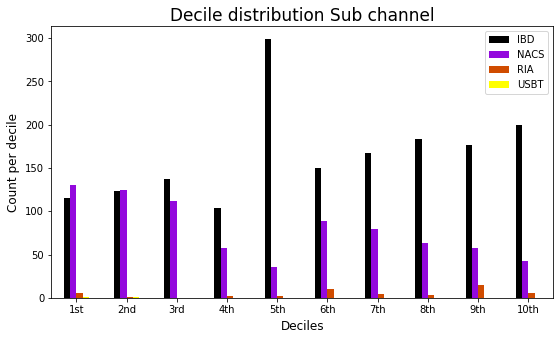

In [142]:
cmap = plt.cm.get_cmap('gnuplot')
newdec.plot(kind='bar',figsize=(9,5),cmap=cmap)
plt.xticks(rotation=-360)
plt.title('Decile distribution Sub channel',fontsize=17,pad=5)
plt.xlabel("Deciles",fontsize=12,labelpad=5)
plt.ylabel("Count per decile",fontsize=12,labelpad=5)

In [143]:
dec_fi_ch=classdf[['decile','Sub channel',"Firm name"]]
for idx,row in dec_fi_ch.iterrows():
    rank=dfl.index(float(row['decile'][-6:-1]))+1
    dec_fi_ch.loc[idx,'Rank']=rank  
defich=dec_fi_ch.copy()
defich.drop(['decile'],axis=1,inplace=True)
defich=fillna_values(defich)

In [144]:
ibdcf= defich.loc[defich['Sub channel'] == 'IBD' ] 
ibdcf.set_index(['Sub channel', 'Firm name'])
ib2=pd.MultiIndex.from_frame(ibdcf).to_frame(index = True) 
ibf=ib2[['Firm name', 'Rank']]
ibf14=ibf[ibf['Firm name']==1471422]
ib14_pd = ibf14['Rank'].value_counts().rename_axis('Rank').reset_index(name='counts')
new_row = {'Rank':10.0, 'counts':0}
ib14_pd = ib14_pd.append(new_row, ignore_index=True)
ib14_pd.sort_values(by='Rank', inplace=True)
ib14_pd.rename({'counts':'1471422'},axis=1,inplace=True)
ibf22=ibf[ibf['Firm name']==22885]
ib22_pd = ibf22['Rank'].value_counts().rename_axis('Rank').reset_index(name='counts')
ib22_pd.sort_values(by='Rank', inplace=True)
ib22_pd.rename({'counts':'0022885'},axis=1,inplace=True)
ib11=ibf[ibf['Firm name']==1194]
ib11_pd = ib11['Rank'].value_counts().rename_axis('Rank').reset_index(name='counts')
ib11_pd.sort_values(by='Rank', inplace=True)
ib11_pd.rename({'counts':'0001194'},axis=1,inplace=True)
ibot=ibf[ibf['Firm name']=='otherid']
ibot_pd = ibot['Rank'].value_counts().rename_axis('Rank').reset_index(name='counts')
ibot_pd.sort_values(by='Rank', inplace=True)
ibot_pd.rename({'counts':'otherid'},axis=1,inplace=True)

In [145]:
ibd_f=pd.merge(ib14_pd,ib22_pd,on='Rank')
ibd_f=pd.merge(ibd_f,ib11_pd,on='Rank')
ibd_f=pd.merge(ibd_f,ibot_pd,on='Rank')
ibd_f.rename(columns={'1471422':'Edward Jones','Rank':'Deciles','otherid':'other firms',
                     '0022885':'LPL Financial LLC','0001194':'Ameriprise Financial Services, Inc.'},inplace=True)
ibd_f['Deciles']=['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th']
ibd_f.set_index('Deciles',inplace=True)

Text(0, 0.5, 'Count per decile')

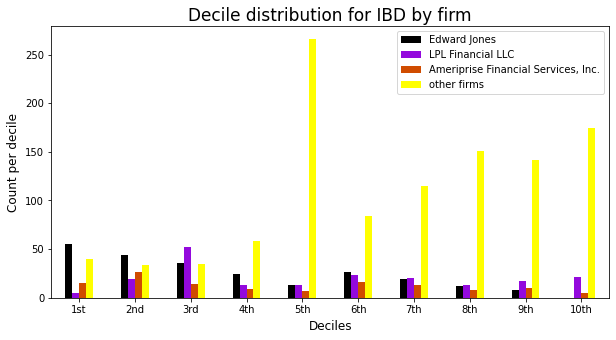

In [146]:
cmap = plt.cm.get_cmap('gnuplot')
ibd_f.plot(kind='bar',figsize=(10,5),cmap=cmap)
plt.xticks(rotation=-360)
plt.title('Decile distribution for IBD by firm',fontsize=17,pad=5)
plt.xlabel("Deciles",fontsize=12,labelpad=5)
plt.ylabel("Count per decile",fontsize=12,labelpad=5)

In [147]:
nacscf= defich.loc[defich['Sub channel'] == 'NACS' ] 
nacot=nacscf[nacscf['Firm name']=='otherid']
nacot_pd = nacot['Rank'].value_counts().rename_axis('Rank').reset_index(name='counts')
nacot_pd.sort_values(by='Rank', inplace=True)
nacot_pd.rename({'counts':'otherid'},axis=1,inplace=True)
nacot_pd.drop('Rank', axis=1, inplace=True)
nac19=nacscf[nacscf['Firm name']==1948520]
nac19_pd = nac19['Rank'].value_counts().rename_axis('Rank').reset_index(name='counts')
nac19_pd.sort_values(by='Rank', inplace=True)
nac19_pd.rename({'counts':'1948520'},axis=1,inplace=True)
nac19_pd.drop('Rank', axis=1, inplace=True)
nac15=nacscf[nacscf['Firm name']==1567450]
nac15_pd = nac15['Rank'].value_counts().rename_axis('Rank').reset_index(name='counts')
nac15_pd.sort_values(by='Rank', inplace=True)
nac15_pd.rename({'counts':'1567450'},axis=1,inplace=True)
nacs_f=pd.concat((nacot_pd,nac15_pd,nac19_pd), axis=1)
nacs_f.rename(columns={'Rank':'Deciles','otherid':'other firms',
                     '1567450':'Merrill Lynch','1948520':'Morgan Stanley Wealth Management'},inplace=True)
nacs_f['Deciles']=['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th']
nacs_f.set_index('Deciles',inplace=True)

Text(0, 0.5, 'Count per decile')

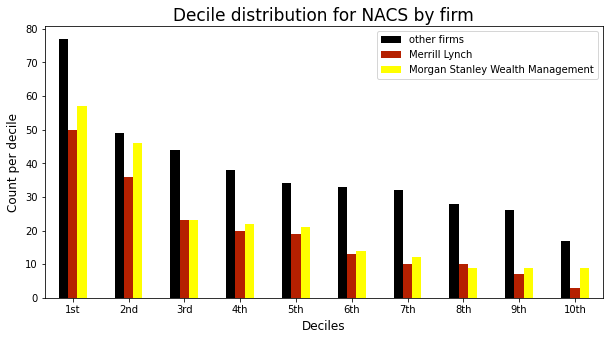

In [148]:
cmap = plt.cm.get_cmap('gnuplot')
nacs_f.plot(kind='bar',figsize=(10,5),cmap=cmap)
plt.xticks(rotation=-360)
plt.title('Decile distribution for NACS by firm',fontsize=17,pad=5)
plt.xlabel("Deciles",fontsize=12,labelpad=5)
plt.ylabel("Count per decile",fontsize=12,labelpad=5)

In [149]:
riacf= defich.loc[defich['Sub channel'] == 'RIA' ] 
riacf_pd = riacf['Rank'].value_counts().rename_axis('Rank').reset_index(name='counts')
riacf_pd.rename(columns={'Rank':'deciles','otherid':'other firms'},inplace=True)
riacf_pd.sort_values(by='deciles', inplace=True)
riacf_pd.rename({'counts':'other firms'},axis=1,inplace=True)
riacf_pd['Deciles']=['1st','2nd','4th','5th','6th','7th','8th','9th','10th']
riacf_pd.drop('deciles', axis=1, inplace=True)
# riacf_pd.set_index('Deciles',inplace=True)
riacf_pd

,other firms,Deciles
3,5,1st
8,1,2nd
7,2,4th
6,2,5th
1,10,6th
4,4,7th
5,3,8th
0,15,9th
2,6,10th


Text(0, 0.5, 'Count per decile')

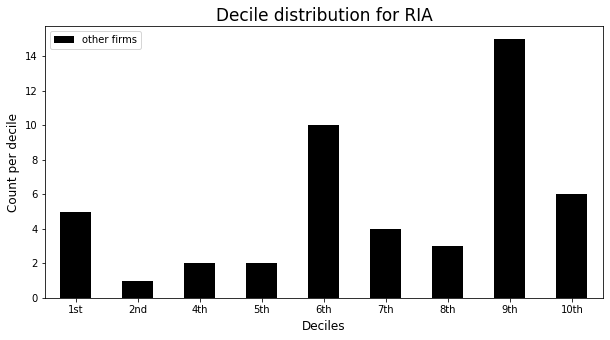

In [150]:
riacf_pd.set_index('Deciles',inplace=True)
cmap = plt.cm.get_cmap('gnuplot')
riacf_pd.plot(kind='bar',figsize=(10,5),cmap=cmap)
plt.xticks(rotation=-360)
plt.title('Decile distribution for RIA',fontsize=17,pad=5)
plt.xlabel("Deciles",fontsize=12,labelpad=5)
plt.ylabel("Count per decile",fontsize=12,labelpad=5)

In [151]:
abc+1

NameError: name 'abc' is not defined

# Class II

In [152]:
class24=pd.read_excel("class_nov24.xlsx")

In [153]:
class24.columns

Index([                 'Unnamed: 0',                          True,
                              'prob',                     'predict',
                            'decile',                         'ch1',
                               'ch2',                         'ch3',
                               'ch4',                         'ch5',
                              'fid1',                        'fid2',
                              'fid3',                        'fid4',
                              'fid5',                        'fid6',
                        'sales_2018',                  'redemption',
                   'No_of_fund_curr',           'No_of_fund_curr.1',
            'no_of_funds_sold_12M_1',           'no_of_sales_12M_1',
            'no_of_Redemption_12M_1', 'no_of_assetclass_sold_12M_1',
                       'Sub channel',                   'Firm name'],
      dtype='object')

In [154]:
classnov24=class24[['decile','sales_2018','redemption','No_of_fund_curr','no_of_funds_sold_12M_1',
                   'no_of_sales_12M_1','no_of_Redemption_12M_1','no_of_assetclass_sold_12M_1']]
classnov24

,decile,sales_2018,redemption,No_of_fund_curr,no_of_funds_sold_12M_1,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_assetclass_sold_12M_1
0,"(0.5, 0.537]",6.457588e+05,1.898885e+04,4,3,26,9,1
1,"(0.398, 0.435]",0.000000e+00,0.000000e+00,0,0,0,0,0
2,"(0.172, 0.307]",0.000000e+00,0.000000e+00,1,0,0,0,0
3,"(0.172, 0.307]",0.000000e+00,1.379321e+04,0,0,0,1,0
4,"(0.584, 0.66]",3.225505e+05,2.852987e+05,3,2,115,211,2
...,...,...,...,...,...,...,...,...
2497,"(0.307, 0.398]",5.923069e+06,1.412306e+06,17,10,328,405,3
2498,"(0.398, 0.435]",0.000000e+00,0.000000e+00,0,0,0,0,0
2499,"(0.537, 0.584]",0.000000e+00,0.000000e+00,0,0,0,0,0
2500,"(0.584, 0.66]",1.599840e+05,2.299770e+04,1,1,5,16,1


In [155]:
decilesC=classnov24['decile'].unique().tolist()
# ddC={}
dflC=[]
decilesC
for dC in decilesC:
    if dC=='(0.452, 0.5]':
        flC=float(dC[-4:-1])
    else:
        flC=float(dC[-6:-1])
    dflC.append(flC)
dflC.sort(reverse=True)
dflC
dflC=[0.845, 0.66, 0.584, 0.537, 0.5, 0.452, 0.435, 0.398, 0.307, 0.172]
for idxC,rowC in classnov24.iterrows():
    if rowC['decile']=='(0.452, 0.5]':
          rankC=dflC.index(float(rowC['decile'][-4:-1]))+1
    else:
        rankC=dflC.index(float(rowC['decile'][-6:-1]))+1
    classnov24.loc[idxC,'Rank']=rankC
classnov24

C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


,decile,sales_2018,redemption,No_of_fund_curr,no_of_funds_sold_12M_1,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_assetclass_sold_12M_1,Rank
0,"(0.5, 0.537]",6.457588e+05,1.898885e+04,4,3,26,9,1,4.0
1,"(0.398, 0.435]",0.000000e+00,0.000000e+00,0,0,0,0,0,7.0
2,"(0.172, 0.307]",0.000000e+00,0.000000e+00,1,0,0,0,0,9.0
3,"(0.172, 0.307]",0.000000e+00,1.379321e+04,0,0,0,1,0,9.0
4,"(0.584, 0.66]",3.225505e+05,2.852987e+05,3,2,115,211,2,2.0
...,...,...,...,...,...,...,...,...,...
2497,"(0.307, 0.398]",5.923069e+06,1.412306e+06,17,10,328,405,3,8.0
2498,"(0.398, 0.435]",0.000000e+00,0.000000e+00,0,0,0,0,0,7.0
2499,"(0.537, 0.584]",0.000000e+00,0.000000e+00,0,0,0,0,0,3.0
2500,"(0.584, 0.66]",1.599840e+05,2.299770e+04,1,1,5,16,1,2.0


In [156]:
# classnov24.set_index('Rank', inplace=True)
classnov24.drop(['decile'],axis=1,inplace=True)
# classnov24

C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [157]:
sls_cls=classnov24[['sales_2018','Rank']]
sals_cls=pd.concat((sls_cls.groupby(['Rank']).count(),sls_cls.groupby(['Rank']).sum()),axis=1)
sals_cls['sales/advisor']=sals_cls.iloc[:,1]/sals_cls.iloc[:,0]
sals_cls.drop(['sales_2018'],axis=1,inplace=True)
sals_cls['Deciles']=['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th']
sals_cls.set_index('Deciles',inplace=True)
sals_cls

,sales/advisor
Deciles,
1st,75999.132264
2nd,225545.040707
3rd,206616.294008
4th,209436.925879
5th,280336.039919
6th,136732.620602
7th,88726.818482
8th,338810.954140
9th,137232.609058


Text(0, 0.5, 'Count per decile')

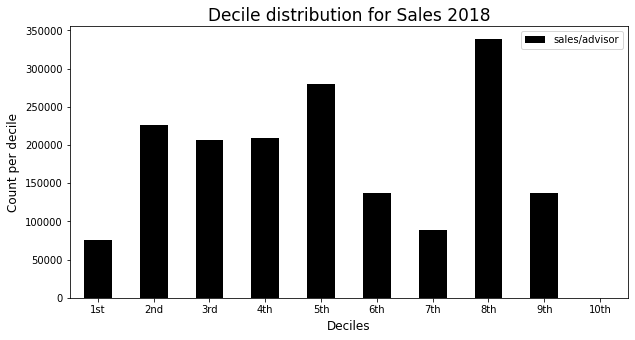

In [158]:
cmap = plt.cm.get_cmap('gnuplot')
sals_cls.plot(kind='bar',figsize=(10,5),cmap=cmap)
plt.title('Decile distribution for Sales 2018',fontsize=17,pad=5)
plt.xticks(rotation=-360)
plt.xlabel("Deciles",fontsize=12,labelpad=5)
plt.ylabel("Count per decile",fontsize=12,labelpad=5)

In [159]:
rdm_cls=classnov24[['redemption','Rank']]
rdm_cls=pd.concat((rdm_cls.groupby(['Rank']).count(),rdm_cls.groupby(['Rank']).sum()),axis=1)
rdm_cls['redemption/advisor']=rdm_cls.iloc[:,1]/rdm_cls.iloc[:,0]
rdm_cls.drop(['redemption'],axis=1,inplace=True)
rdm_cls['Deciles']=['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th']
rdm_cls.set_index('Deciles',inplace=True)
rdm_cls

,redemption/advisor
Deciles,
1st,35246.075680
2nd,223138.526459
3rd,221758.288095
4th,129760.772949
5th,198498.789237
6th,139607.799182
7th,158474.528227
8th,255823.255124
9th,128435.326868


Text(0, 0.5, 'Count per decile')

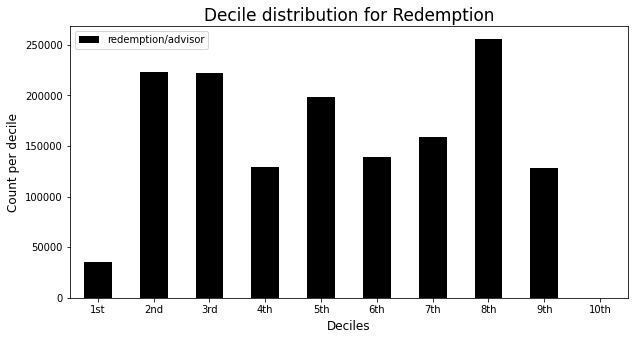

In [160]:
cmap = plt.cm.get_cmap('gnuplot')
rdm_cls.plot(kind='bar',figsize=(10,5),cmap=cmap)
plt.title('Decile distribution for Redemption',fontsize=17,pad=5)
plt.xticks(rotation=-360)
plt.xlabel("Deciles",fontsize=12,labelpad=5)
plt.ylabel("Count per decile",fontsize=12,labelpad=5)

In [161]:
nof_cls=classnov24[['No_of_fund_curr','Rank']]
nof_cls=pd.concat((nof_cls.groupby(['Rank']).count(),nof_cls.groupby(['Rank']).sum()),axis=1)

nof_cls['No_of_fund_curr/Advisor']=(nof_cls.iloc[:,1]*1.0)/(nof_cls.iloc[:,0])*1.0
# nof_cls
nof_cls.drop(['No_of_fund_curr'],axis=1,inplace=True)
nof_cls['Deciles']=['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th']
nof_cls.set_index('Deciles',inplace=True)
nof_cls

,No_of_fund_curr/Advisor
Deciles,
1st,0.960159
2nd,2.812000
3rd,2.966805
4th,2.536680
5th,3.128000
6th,2.666667
7th,0.979118
8th,2.348000
9th,1.764000


Text(0, 0.5, 'Count per decile')

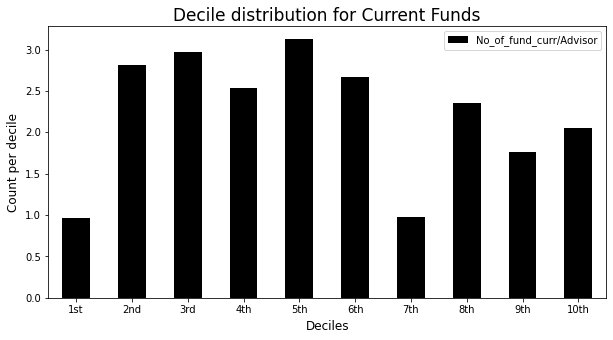

In [162]:
cmap = plt.cm.get_cmap('gnuplot')
nof_cls.plot(kind='bar',figsize=(10,5),cmap=cmap)
plt.title('Decile distribution for Current Funds',fontsize=17,pad=5)
plt.xlabel("Deciles",fontsize=12,labelpad=5)
plt.xticks(rotation=-360)
plt.ylabel("Count per decile",fontsize=12,labelpad=5)

In [163]:
nfs_cls=classnov24[['no_of_funds_sold_12M_1','Rank']]
nfs_cls=pd.concat((nfs_cls.groupby(['Rank']).count(),nfs_cls.groupby(['Rank']).sum()),axis=1)
nfs_cls['no_of_funds_sold_12M_1/advisor']=(nfs_cls.iloc[:,1]*1.0)/(nfs_cls.iloc[:,0])*1.0
nfs_cls.drop(['no_of_funds_sold_12M_1'],axis=1,inplace=True)
nfs_cls['Deciles']=['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th']
nfs_cls.set_index('Deciles',inplace=True)
nfs_cls

,no_of_funds_sold_12M_1/advisor
Deciles,
1st,1.231076
2nd,2.600000
3rd,2.224066
4th,1.783784
5th,2.192000
6th,1.565217
7th,0.591647
8th,1.404000
9th,0.180000


Text(0, 0.5, 'Count per decile')

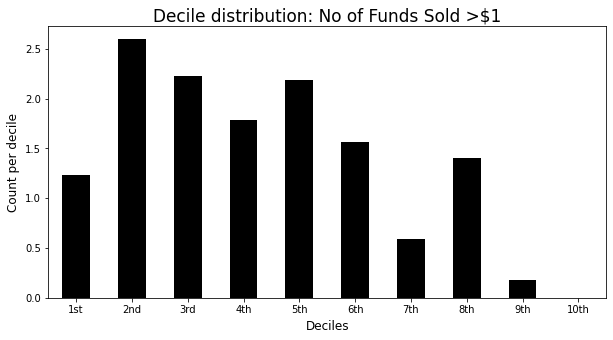

In [164]:
nfs_cls.plot(kind='bar',figsize=(10,5),cmap=cmap,legend=None)
plt.title('Decile distribution: No of Funds Sold >$1',fontsize=17,pad=5)
plt.xlabel("Deciles",fontsize=12,labelpad=5)
plt.xticks(rotation=-360)
plt.ylabel("Count per decile",fontsize=12,labelpad=5)

In [165]:
ns12_cls=classnov24[['no_of_sales_12M_1','Rank']]
ns12_cls=pd.concat((ns12_cls.groupby(['Rank']).count(),ns12_cls.groupby(['Rank']).sum()),axis=1)
ns12_cls['no_of_sales_12M_1/advisor']=(ns12_cls.iloc[:,1]*1.0)/(ns12_cls.iloc[:,0])*1.0
ns12_cls.drop(['no_of_sales_12M_1'],axis=1,inplace=True)
ns12_cls['Deciles']=['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th']
ns12_cls.set_index('Deciles',inplace=True)
ns12_cls

,no_of_sales_12M_1/advisor
Deciles,
1st,11.984064
2nd,33.944000
3rd,30.298755
4th,21.073359
5th,29.112000
6th,18.710145
7th,10.682135
8th,39.140000
9th,8.308000


Text(0, 0.5, 'Count per decile')

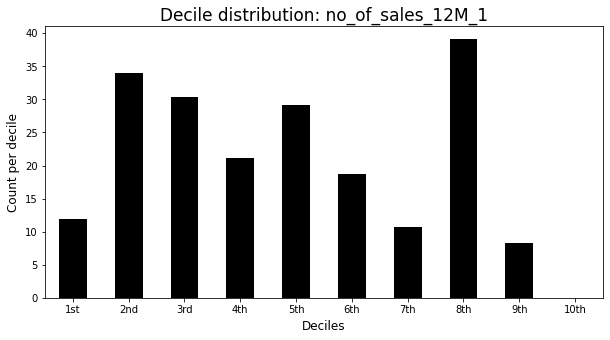

In [166]:
ns12_cls.plot(kind='bar',figsize=(10,5),cmap=cmap,legend=False)
plt.title('Decile distribution: no_of_sales_12M_1',fontsize=17,pad=5)
plt.xlabel("Deciles",fontsize=12,labelpad=5)
plt.xticks(rotation=-360)
plt.ylabel("Count per decile",fontsize=12,labelpad=5)

In [167]:
nr_cls=classnov24[['no_of_Redemption_12M_1','Rank']]
nr_cls=pd.concat((nr_cls.groupby(['Rank']).count(),nr_cls.groupby(['Rank']).sum()),axis=1)
nr_cls['no_of_Redemption_12M_1/advisor']=(nr_cls.iloc[:,1]*1.0)/(nr_cls.iloc[:,0])*1.0
nr_cls.drop(['no_of_Redemption_12M_1'],axis=1,inplace=True)
nr_cls['Deciles']=['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th']
nr_cls.set_index('Deciles',inplace=True)
nr_cls

,no_of_Redemption_12M_1/advisor
Deciles,
1st,10.804781
2nd,21.948000
3rd,24.112033
4th,22.722008
5th,26.228000
6th,16.478261
7th,21.296984
8th,45.624000
9th,50.196000


Text(0, 0.5, 'Count per decile')

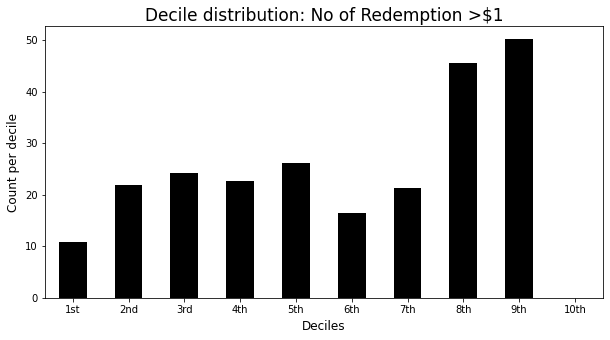

In [168]:
nr_cls.plot(kind='bar',figsize=(10,5),cmap=cmap,legend=None)
plt.title('Decile distribution: No of Redemption >$1',fontsize=17,pad=5)
plt.xlabel("Deciles",fontsize=12,labelpad=5)
plt.xticks(rotation=-360)
plt.ylabel("Count per decile",fontsize=12,labelpad=5)

In [169]:
na_cls=classnov24[['no_of_assetclass_sold_12M_1','Rank']]
na_cls=pd.concat((na_cls.groupby(['Rank']).count(),na_cls.groupby(['Rank']).sum()),axis=1)
na_cls['no_of_assetclass_sold_12M_1/advisor']=(na_cls.iloc[:,1]*1.0)/(na_cls.iloc[:,0])*1.0
na_cls.drop(['no_of_assetclass_sold_12M_1'],axis=1,inplace=True)
na_cls['Deciles']=['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th']
na_cls.set_index('Deciles',inplace=True)
na_cls

,no_of_assetclass_sold_12M_1/advisor
Deciles,
1st,0.816733
2nd,1.556000
3rd,1.360996
4th,1.084942
5th,1.312000
6th,1.014493
7th,0.368910
8th,0.672000
9th,0.068000


Text(0, 0.5, 'Count per decile')

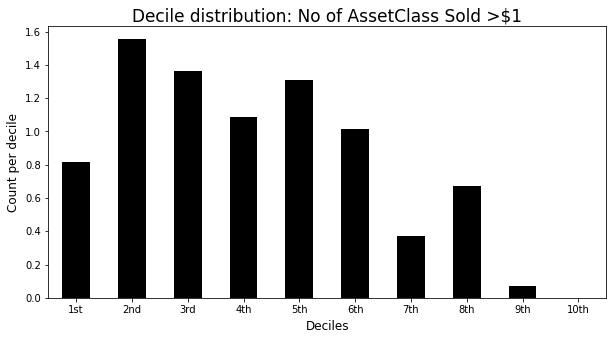

In [170]:
na_cls.plot(kind='bar',figsize=(10,5),cmap=cmap, legend=None)
plt.title('Decile distribution: No of AssetClass Sold >$1',fontsize=17,pad=5)
plt.xlabel("Deciles",fontsize=12,labelpad=5)
plt.xticks(rotation=-360)
plt.ylabel("Count per decile",fontsize=12,labelpad=5)

# Feature Importances

Text(0, 0.5, 'Feature')

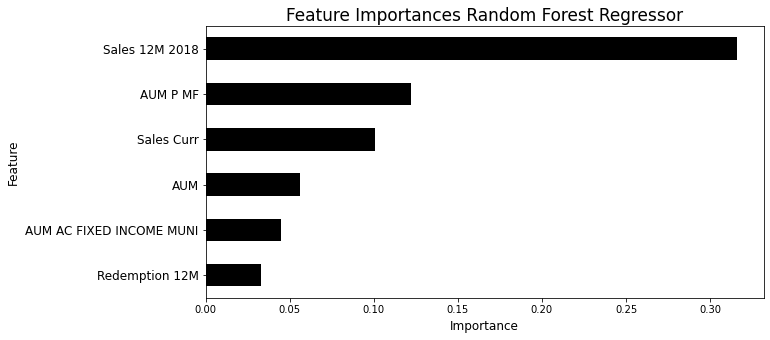

In [171]:
# feim_r=[['sales_12M_2018',0.316],['aum_P_MF',0.122],['sales_curr',0.101],['AUM',0.056],
#         ['aum_AC_FIXED_INCOME_MUNI',0.045],['redemption_12M',0.033]]
feim_r=[['Sales 12M 2018',0.316],['AUM P MF',0.122],['Sales Curr',0.101],['AUM',0.056],
        ['AUM AC FIXED INCOME MUNI',0.045],['Redemption 12M',0.033]]
featimp_regr=pd.DataFrame(feim_r,columns=['Feature','Importance'])
featimp_regr.sort_values(by='Importance', inplace=True,ascending=True)
featimp_regr.set_index('Feature', inplace=True)

featimp_regr.plot(kind='barh',figsize=(10,5),cmap=cmap,legend=None)
plt.title('Feature Importances Random Forest Regressor',fontsize=17,pad=5)
plt.yticks(fontsize=12)
plt.xlabel("Importance",fontsize=12,labelpad=5)
plt.ylabel("Feature",fontsize=12,labelpad=5)


Text(0, 0.5, 'Feature')

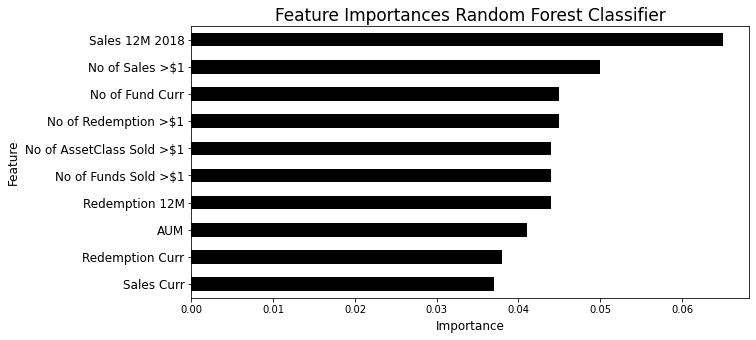

In [172]:
# feim_c=[['sales_12M_2018',0.065],['no_of_sales_12M_1',0.05],['sales_curr',0.037],['AUM',0.041],
#         ['no_of_Redemption_12M_1',0.045],['redemption_12M',0.044],['No_of_fund_curr',0.045],
#         ['no_of_funds_sold_12M_1',0.044],['no_of_assetclass_sold_12M_1',0.044],['redemption_curr',0.038]]
feim_c=[['Sales 12M 2018',0.065],['No of Sales >$1',0.05],['Sales Curr',0.037],['AUM',0.041],
        ['No of Redemption >$1',0.045],['Redemption 12M',0.044],['No of Fund Curr',0.045],
        ['No of Funds Sold >$1',0.044],['No of AssetClass Sold >$1',0.044],['Redemption Curr',0.038]]
featimp_clss=pd.DataFrame(feim_c,columns=['Feature','Importance'])
featimp_clss.sort_values(by='Importance', inplace=True,ascending=True)
featimp_clss.set_index('Feature', inplace=True)

featimp_clss.plot(kind='barh',figsize=(10,5),cmap=cmap, legend = False)
plt.title('Feature Importances Random Forest Classifier',fontsize=17,pad=5)
plt.xlabel("Importance",fontsize=12,labelpad=5)
plt.yticks(fontsize=12)
plt.ylabel("Feature",fontsize=12,labelpad=5)

# Regression Analysis


In [173]:
abc+1

NameError: name 'abc' is not defined

In [174]:
from statsmodels.tsa import tsatools
import statsmodels.stats as stats
import statsmodels.stats.stattools as stools
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import *
import statsmodels.api as sm
from statsmodels.tsa import tsatools
from scipy import stats
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot

In [175]:
full_df.drop(['Contact ID', 'refresh_date_2019','refresh_date_2018',
                       'new_Fund_added_12M_2019','Firm name', 'Channel', 'Sub channel','Firm ID', 
              'CustomerID','Office ID'], axis=1, inplace=True)

In [176]:
full_df[full_df<0]=0

In [177]:
X=full_df[['AUM',
 'sales_curr',
 'sales_12M_2018',
 'redemption_12M',
 'aum_AC_FIXED_INCOME_MUNI',
 'aum_P_MF']]

In [178]:
y=full_df['sales_12M_2019']

In [179]:
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [180]:
rfr_feata=RandomForestRegressor(n_estimators=100,max_depth=9)

In [181]:
X_traina, X_testa, y_traina, y_testa=train_test_split(X,y, test_size=0.25)
pt3=PowerTransformer()
pt4=PowerTransformer()
X_train2a=pt3.fit_transform(X_traina)
X_test2a=pt3.transform(X_testa)

y_train2a=pt4.fit_transform(y_traina.to_numpy().reshape(-1,1))
y_test=pt4.transform(y_testa.to_numpy().reshape(-1,1))
rfr_feata.fit(X_train2a,y_train2a.ravel())
y_preda=rfr_feata.predict(X_test2a)
print("Validation score R2: \n",rfr_feata.score(X_test2a, y_test.ravel()))
print("Mean Squared Error: \n",mean_squared_error(y_test.ravel(), y_preda.ravel()))
ra_results = cross_validate(rfr_feata, X_test2a, y_test.ravel(), cv=3)
print("Cross Validate Scores: \n", ra_results['test_score'])

Validation score R2: 
 0.5378391854484953
Mean Squared Error: 
 0.46600005730436966
Cross Validate Scores: 
 [0.55283084 0.53717514 0.47683553]


In [182]:
# full_test.head()

In [183]:
X_test2a.shape

(2502, 6)

In [184]:
y_preda.shape

(2502,)

In [185]:
a=pt4.inverse_transform(y_test.reshape(-1,1))
a=a.flatten()
b=pt4.inverse_transform(y_preda.reshape(-1,1))
b=b.flatten()

In [186]:
b.shape

(2502,)

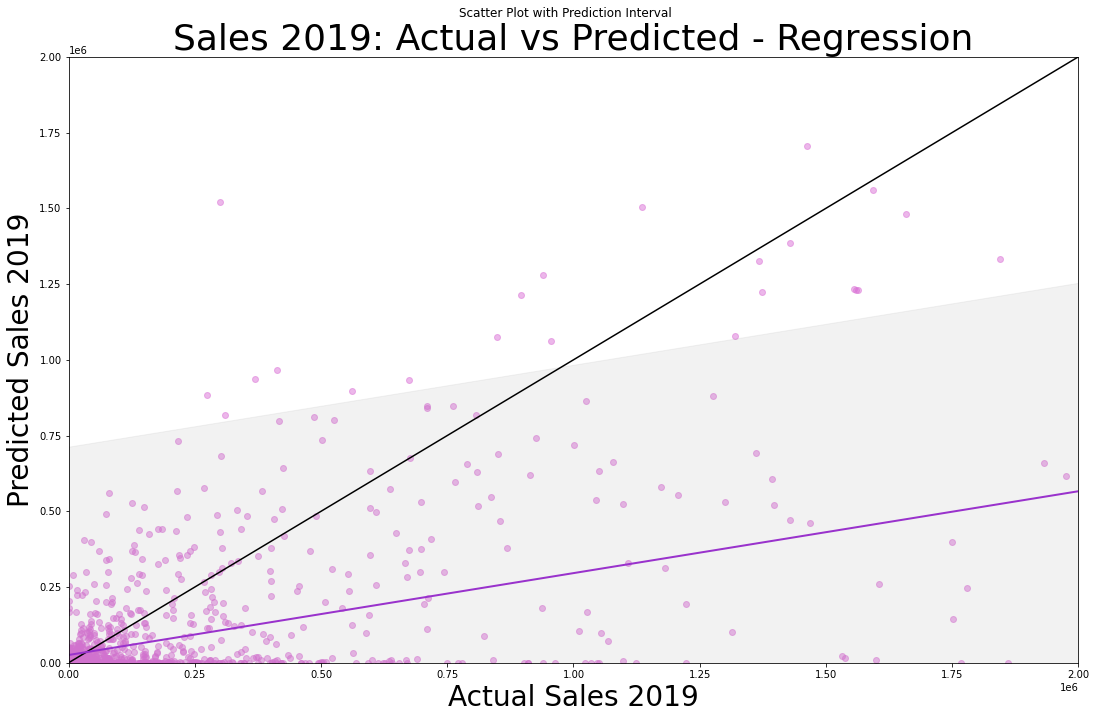

In [187]:
if a.shape ==b.shape:    
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.scatter(x=a, 
               y=b, alpha=0.5, color='orchid')
    fig.suptitle('Scatter Plot with Prediction Interval')
    fig.tight_layout(pad=2);
    #------------
    a2 = sm.add_constant(a) # constant intercept term
    # Model: y ~ x + c
    model = sm.OLS(b,a2)
    fitted = model.fit()

    x_pred = np.linspace(a2.min(), a2.max(), 50)
    x_pred2 = sm.add_constant(x_pred)

    y_pred = fitted.predict(x_pred2)
    ax.plot([0, 2000000], [0,2000000],c='black')
    ax.set_xlim([0,2000000])
    ax.set_ylim([0, 2000000])

    ax.plot(x_pred, y_pred, '-', color='darkorchid', linewidth=2)
    ax.set_title("Sales 2019: Actual vs Predicted - Regression", fontsize=36)
    ax.set_xlabel("Actual Sales 2019", fontsize=28)
    ax.set_ylabel("Predicted Sales 2019", fontsize=28);
   
    sdev, lower, upper = wls_prediction_std(fitted, exog=x_pred2, alpha=0.05)

    ax.fill_between(x_pred, lower, upper, color='#888888', alpha=0.1)
else:
    print('shapes dont match')

In [188]:
x1=pt3.inverse_transform(X_test2a)
y0=a
y1=b

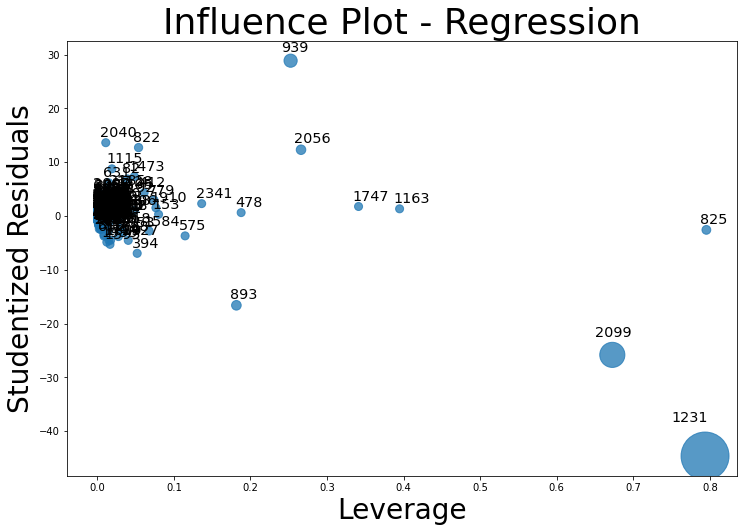

In [189]:
lm=sm.OLS(y1,sm.add_constant(x1)).fit()
# print('r2:'+str(lm.rsquared))
fig, ax=plt.subplots(figsize=(12,8))
fig=sm.graphics.influence_plot(lm, alpha=0.5,ax=ax,criterion='cooks')
ax.set_title("Influence Plot - Regression", fontsize=36)
ax.set_xlabel("Leverage", fontsize=28)
ax.set_ylabel("Studentized Residuals", fontsize=28);

In [190]:
# levers=[1639,1266,738,135,704,148,10,1490,1715]
levers=[980,1264,1491,1850]

In [191]:
def scatter_ys(a,b):
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.scatter(x=a, 
               y=b, alpha=0.5, color='orchid')
#     fig.suptitle('Example Scatter Plot')
    fig.tight_layout(pad=2);
    #------------
    a2 = sm.add_constant(a) # constant intercept term
    # Model: y ~ x + c
    model = sm.OLS(b,a2)
    fitted = model.fit()

    x_pred = np.linspace(a2.min(), a2.max(), 50)
    x_pred2 = sm.add_constant(x_pred)

    y_pred = fitted.predict(x_pred2)
    ax.plot([0, 20000000], [0,20000000],c='black')
    ax.set_xlim([0,20000000])
    ax.set_ylim([0, 20000000])
    
    for lev in levers:
        plt.scatter(a[lev],b[lev],color='green')
        ax.annotate(lev, (a[lev], b[lev]))
    ax.plot(x_pred, y_pred, '-', color='darkorchid', linewidth=2)
    ax.set_title("Sales 2019: Actual vs Predicted - Regression", fontsize=36)
    ax.set_xlabel("Actual Sales 2019", fontsize=28)
    ax.set_ylabel("Predicted Sales 2019", fontsize=28);

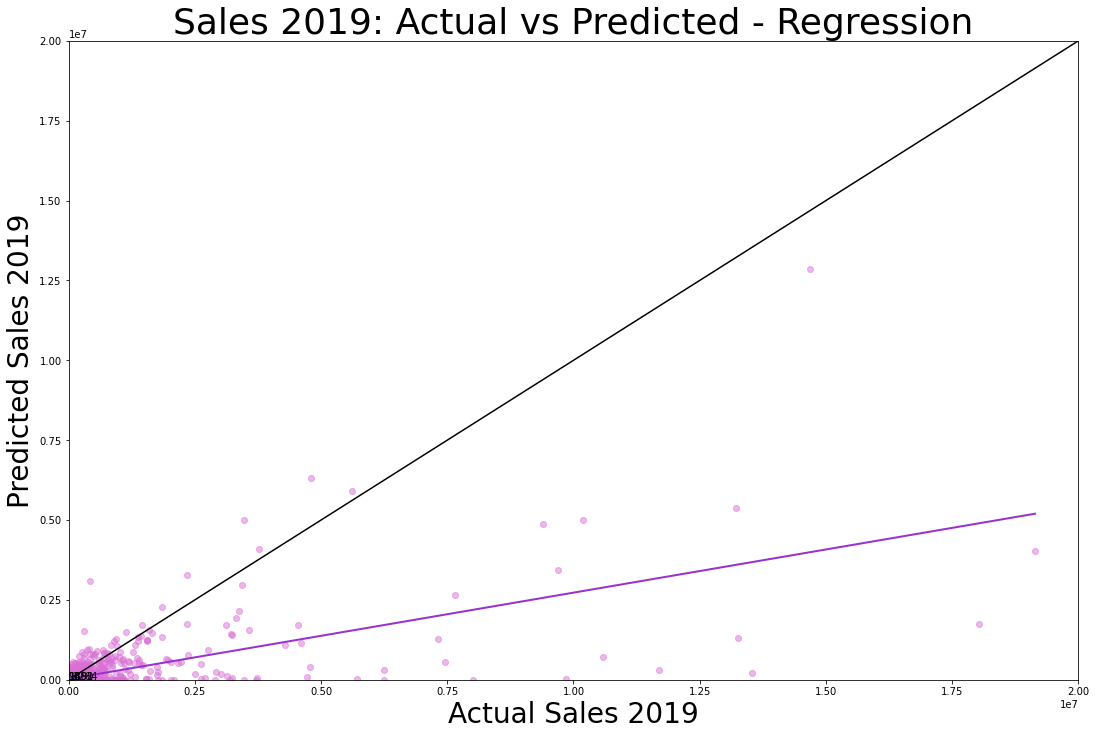

In [192]:
scatter_ys(a,b)

In [193]:
x1b=np.delete(x1, levers,0)
y0b=np.delete(y0,levers, 0)
y1b=np.delete(y1,levers, 0)

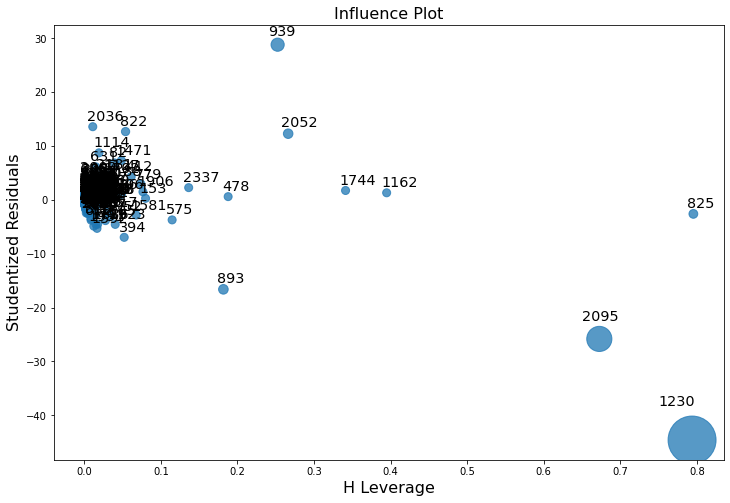

In [194]:
lm=sm.OLS(y1b,sm.add_constant(x1b)).fit()
fig, ax=plt.subplots(figsize=(12,8))
fig=sm.graphics.influence_plot(lm, alpha=0.5,ax=ax,criterion='cooks')